# Análise do vestibular ENEM 2019

## Introduction to Data Science

## The CRISP-DM approach to Data Science Tasks

_________________________

## I. Business Understanding
                    
#### The Business Understanding phase focuses on understanding the objectives and requirements of the project.  
+ Determine business objectives:   
+ Assess situation:  
+ Determine data mining goals:  
+ Produce project plan:  



#### Determine business objectives:   

* Compreender quais aspectos melhor determinam a nota de um aluno no Enem de acordo com a Teoria de Resposta ao Item.

- Observar se existe uma correlação entre as notas de cada uma das 4 áreas do conhecimento e a redação. 

* Entender como é distribuida a educação no país, e quais fatores interferem no desempenho de um estudante.

- Analisar se com as cotas há um acesso mais democrático às instituições públicas de ensino.

#### Assess situation:  

* Sabemos que o ENEM utiliza o TRI (Teoria de Resposta ao Item) que classifica as questões conforme a dificuldade, isto é, cada questão possui um peso pré-determinado que não conhecido do público. Esse sistema é utilizado para evitar "chutes", se um aluno erra uma questão considerada fácil e acerta uma questão considerada difícil, o aluno sofre uma penalidade. Desse modo, mesmo com o gabarito dos alunos não nos é possível determinar a nota correta dos alunos, pretendemos obter o melhor modelo de regrassão para atribuir a nota aos alunos.

- A priori, acreditamos que no Brasil, as escolas privadas e escolas públicas federais obtém um melhor desempenho no ENEM, do que os alunos de escolas públicas estaduais e municipais. Além disso, acreditamos que a locaclização geográfica da escola e da moradia do estudante e a renda familiar influencia no seu desempenho, alunos que moram em situações vuneráveis e|ou possuem baixa renda tendem a obter um desempenho inferior a média nacional. 

#### Determine data mining goals:  

- Obter os dados oficiais do INEP de todos os alunos que fizeram o vestibular no ano de 2019: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem onde consta os microdados do ENEM ("Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem" - INEP).

* Obter as notas de corte de algumas universidades públicas brasileiras para analizar a democratização do ensino público.

#### Produce project plan: 

- Limpar os dados, por exemplo, remover os alunos treineiros e alunos que não concluiram o vestibular da base de dados.

* Analisar os nossos dados, obter as médias, os mínimos e os máximos.

- Criar classificadores, se necessário. 

* Determinar as informações que serão utilizadas em cada modelo.

- Observar se existe alguma correlação dentre as informações disponíveis. 

* Encontrar o melhor modelo de regressão para as notas.

- Analisar a questão das cotas e da nota de corte das universidades públicas.

* Reunir as informações obtidas e concluir o trabalho.


## II. Data Understanding  

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

Os dados oficiais do vestibular foram obtidos através de https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem nele vamos utilizar o arquivo MICRODADDOS_ENEM_2019.csv com os dados brutos de todos os alunos que realizaram o ENEM. Já o arquivo Dicionário_Microdados_Enem_2019.xlsx descreve esses dados.

In [1]:
# Importando Bibliotecas 

import numpy as np
import pandas as pd
import seaborn as sns
import dask
import json
import dask.dataframe as dd
import matplotlib.pyplot as plt
import regex as re

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, SGDRegressor,TweedieRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, r2_score,max_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time
from scipy.stats import randint
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.callbacks import EarlyStopping

import lightgbm as ltb

In [3]:
# Importando os Dados

dic = pd.read_excel('Dicionário_Microdados_Enem_2019.xlsx' )

#df = pd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",decimal=",")
#df.head()

# df = dd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",dtype={'NU_IDADE': 'float64'})
df = dd.read_csv("MICRODADOS_ENEM_2019.csv",sep=";",encoding = "ISO-8859-1",dtype={'NU_IDADE': 'float64', 
                                                                                   'CO_MUNICIPIO_NASCIMENTO':'float64', 
                                                                                   'CO_UF_NASCIMENTO':'float64', 
                                                                                   'NO_MUNICIPIO_ESC':'object', 
                                                                                   'SG_UF_ESC':'object'})

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


### Observações gerais:

* Há 3 tipos de vestibulandos que realizaram o ENEM, os estudantes que ainda não terminaram o Ensino Médio, os alunos que concluíram o Ensino Médio no ano de 2019, e os alunos que concluíram o ENEM anteriormente.
    - Segundo as informações do INEP, as notas dos alunos em cada uma das provas segue uma distribuição normal com média 500 e desvião padrão 100 dos alunos que terminaram o vestibular no ano de 2019.
* As primeiras colunas referem-se aos dados pessoais do vestibulando:
    - Município de Residência;
    - Idade;
    - Sexo (M para masculino e F para feminino);
    - Estado Civil;
    - Raça; 
    - Nacionadlidade e cidade de nascença. 
* Em seguida há colunas referentes a escolaridade básica:
    - Se concluiu ou não o Ensino Médio;
    - Se sim em qual escola;
    - O ano que ele concluiu;
    - Informações da localização da escola;
    - Informações do tipo de escola.
* As próximas colunas se referem a necessidade de um atendimento especial por causa de alguma deficiência.
    - Não iremos entrar muito em detalhes, pois nesse trabalho vamos focar nos estudantes que não possuem problemas físicos, já que não há garantias que o Inep ofereça os auxílios adequados para essas pessoas terem as mesmas oportunidades.
* Depois, seguem as colunas com informações do local de aplicação do vestibular.
* Nas colunas posteriores os dados são relacionados à prova:
    - A presença dos alunos em cada umas das provas;
    - As repostas dos candidatos as questões objetivas;
    - Notas de cada uma das avaliações;
    - Gabarito oficial da prova que o aluno concluiu;
    - Nota da Redação e de cada uma das 5 competências.
* Por fim temos o questionário socioeconômico:
    - Perguntas aos candidatos sobre a sua família;
    - Perguntas sobre a renda familiar;
    - Perguntas sobre a moradia.

In [ ]:
df.describe(include='all')


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,object,float64,object,float64,object,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: object(41), float64(25), int64(70)

Analizando os dados faltates do dataframe:

In [ ]:
nans = df.isnull().sum()

i = 0

for j in nans:
    print(df.columns[i],j)
    i = i+1

NU_INSCRICAO 0
NU_ANO 0
CO_MUNICIPIO_RESIDENCIA 0
NO_MUNICIPIO_RESIDENCIA 0
CO_UF_RESIDENCIA 0
SG_UF_RESIDENCIA 0
NU_IDADE 69
TP_SEXO 0
TP_ESTADO_CIVIL 0
TP_COR_RACA 0
TP_NACIONALIDADE 0
CO_MUNICIPIO_NASCIMENTO 145249
NO_MUNICIPIO_NASCIMENTO 145249
CO_UF_NASCIMENTO 145249
SG_UF_NASCIMENTO 145249
TP_ST_CONCLUSAO 0
TP_ANO_CONCLUIU 0
TP_ESCOLA 0
TP_ENSINO 2217073
IN_TREINEIRO 0
CO_ESCOLA 3947858
CO_MUNICIPIO_ESC 3947858
NO_MUNICIPIO_ESC 3947858
CO_UF_ESC 3947858
SG_UF_ESC 3947858
TP_DEPENDENCIA_ADM_ESC 3947858
TP_LOCALIZACAO_ESC 3947858
TP_SIT_FUNC_ESC 3947858
IN_BAIXA_VISAO 0
IN_CEGUEIRA 0
IN_SURDEZ 0
IN_DEFICIENCIA_AUDITIVA 0
IN_SURDO_CEGUEIRA 0
IN_DEFICIENCIA_FISICA 0
IN_DEFICIENCIA_MENTAL 0
IN_DEFICIT_ATENCAO 0
IN_DISLEXIA 0
IN_DISCALCULIA 0
IN_AUTISMO 0
IN_VISAO_MONOCULAR 0
IN_OUTRA_DEF 0
IN_GESTANTE 0
IN_LACTANTE 0
IN_IDOSO 0
IN_ESTUDA_CLASSE_HOSPITALAR 0
IN_SEM_RECURSO 0
IN_BRAILLE 0
IN_AMPLIADA_24 0
IN_AMPLIADA_18 0
IN_LEDOR 0
IN_ACESSO 0
IN_TRANSCRICAO 0
IN_LIBRAS 0
IN_TEMPO_ADIC

Observamos que as notas faltantes correnspondem aos alunos que faltaram no dia do vestibular ou tiveram sua prova anulada:

In [ ]:
present = [
    df.groupby('TP_PRESENCA_CN').NU_NOTA_CN.sum().compute(),
    df.groupby('TP_PRESENCA_CH').NU_NOTA_CH.sum().compute(),
    df.groupby('TP_PRESENCA_LC').NU_NOTA_LC.sum().compute(),
    df.groupby('TP_PRESENCA_MT').NU_NOTA_MT.sum().compute()]
    
print(present)

[TP_PRESENCA_CN
0    0.000000e+00
1    1.772934e+09
2    0.000000e+00
Name: NU_NOTA_CN, dtype: float64, TP_PRESENCA_CH
0    0.000000e+00
1    1.990010e+09
2    0.000000e+00
Name: NU_NOTA_CH, dtype: float64, TP_PRESENCA_LC
0    0.000000e+00
1    2.042066e+09
2    0.000000e+00
Name: NU_NOTA_LC, dtype: float64, TP_PRESENCA_MT
0    0.000000e+00
1    1.941017e+09
2    0.000000e+00
Name: NU_NOTA_MT, dtype: float64]


 Há tabém alguns dados faltantes relacionados a esocola de conclusão do Ensino Médio. É óbivio que os alunos treneiros não concluiram o ensino básico não possuem essas informações. 
 
 * Veremos se há uma corelação entre os tipos de vestibulandos, segundo o dicionário dos microdados do ENEM temos os seguintes tipos na coluna TP_ST_CONCLUSAO (Situação de conclusão do Ensino Médio):
    - 1: Já concluiu o EM, 
    - 2: Concluiu o EM em 2019, 
    - 3: Vai concluir o EM após 2019 (treneiros), 
    - 4: não concluiu e não está cursnado o EM (treneiros).

In [ ]:
df.groupby('TP_ST_CONCLUSAO').CO_ESCOLA.mean().compute()

TP_ST_CONCLUSAO
1             NaN
2    3.126575e+07
3             NaN
4             NaN
Name: CO_ESCOLA, dtype: float64

De fato, apenas quem concliu o Ensio Médio no ano do vestibular respondeu o questionário sobre a escola. Agora vou realizar uma análise relacionado ao tipo de escola para saber se há também perda de dados entre as escolas públicas e privadas. 
* Segundo os Microdados do ENEM a coluna TP_ESCOLA representa:
    - 1:	Não Respondeu	
    - 2:	Pública	
    - 3:	Privada	
    - 4:	Exterior	


#### Análise correlacional dos dados.

<ipython-input-8-af9507991398>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

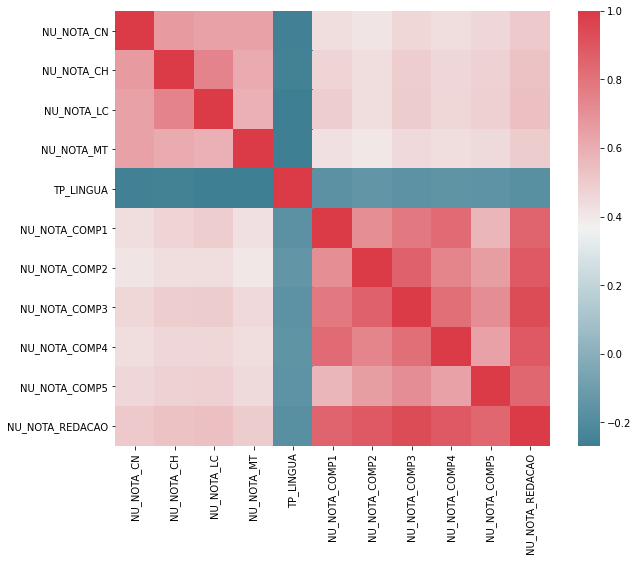

In [ ]:
#Correlação entre as notas.


ENEM = df.iloc[:,91:111].compute()
ENEM = ENEM.drop(["TP_STATUS_REDACAO"],axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = ENEM.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Pelo gráfico acima, notamos que há uma grande correlação positiva entre as quatro grandes áreas de conhecimento, que variam entre 0,5 à 0,8, sendo Ciências Humanas e Linguagens e Códigos com a maior correlação. Além disso, percebemos que o tipo de lingua escolhida tem muito pouca influência na nota das outras áreas, ou seja, não importa se a pessoa escolher inglês ou espanhol, não mudará tanto a nota obtida nas outras áreas.

Por fim, temos que de fato, as pessoas que possuem maior facilidade em Linguens e Códigos e Ciências Humanas há uma pequena vantagem de obter uma nota maior na Redação do Enem, já que há uma correlação positiva um pouco maior do que Matemática e Ciências Naturais.

<AxesSubplot:>

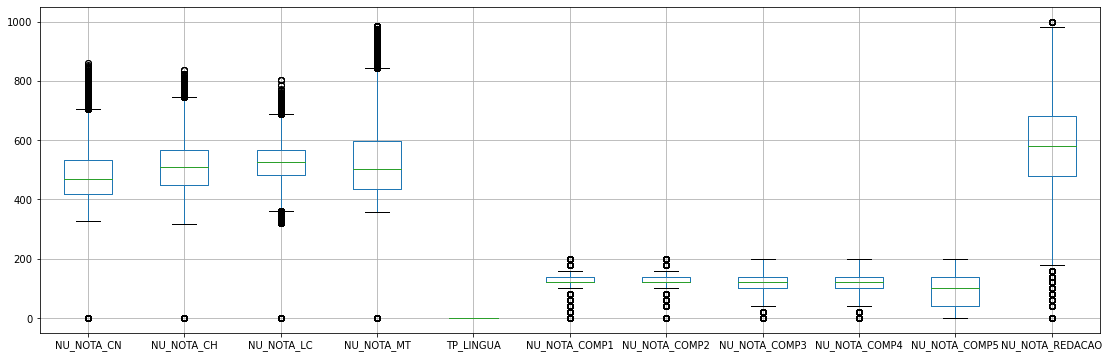

In [ ]:
ENEM.boxplot(fontsize=10,figsize=(19, 6))

O boxplot acima relaciona as notas obtidas em cada área do conhecimento, e a nota da redação, mostrando também a nota de cada competência. Ao observamos, notamos que o assunto em que grande parte das pessoas vão mal é Ciências Naturais, pois possui a menor mediana, seguida por Matemática, Ciências Humanas, Linguagens e Código e por fim a Redação.  Mesmo a matemática sendo uma das matérias em que grande parte parte das pessoas vão mal, em contrapartida, é a área do conhecimento que há a maior concentração de pessoas com as melhores notas, já que o 3º quartil acaba bem depois das outras áreas.

Também notamos que a nota da redação é o que apresenta maior dispersão. Essa alta dispersão pode ser principalmente obtida pela competência cinco, que é a que possui a menor mediana, e também tem os seus limites inferiores e superiores variando de 0 a 200, ou seja, o valor máximo e mínimo que pode ser obtido na nota de cada competência do Enem. Vale ressaltar, que dentre as outras competências, a 1 e a 2, foram as que os participantes obtiveram a menor variação entre as notas, tendo assim vários outliers, dados atípicos na distribuição, de pessoas que conseguiram notas muito alta ou baixas na competência.

Text(0.5, 1.0, 'Gráfico de densidade das áreas de conhecimento e Redação do ENEM pela nota ')

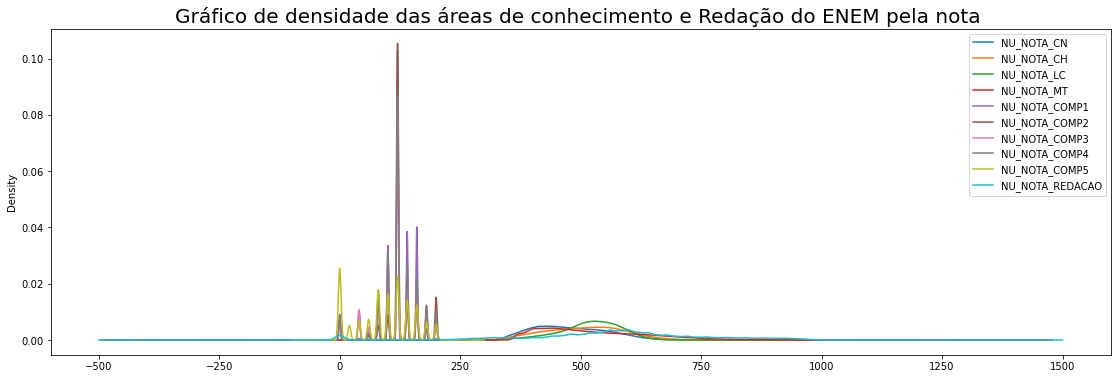

In [ ]:
ENEM.drop(["TP_LINGUA"],axis=1).plot.density(fontsize=10,figsize=(19, 6))
plt.title('Gráfico de densidade das áreas de conhecimento e Redação do ENEM pela nota ', size = 20)

#### Média das Notas por tipo de escola

* Os tipo de escola.
    - 1: Federal
    - 2: Estadual
    - 3: Municipal
    - 4: Privada


In [ ]:
school = [
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_DEPENDENCIA_ADM_ESC').NU_NOTA_REDACAO.mean().compute()]
    
print(school)

[TP_DEPENDENCIA_ADM_ESC
1.0    532.028308
2.0    455.013115
3.0    478.989470
4.0    544.780595
Name: NU_NOTA_CN, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    559.486424
2.0    485.943224
3.0    509.130196
4.0    571.588744
Name: NU_NOTA_CH, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    559.152574
2.0    503.874176
3.0    522.910669
4.0    567.969100
Name: NU_NOTA_LC, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    605.685105
2.0    497.209439
3.0    526.443656
4.0    627.826030
Name: NU_NOTA_MT, dtype: float64, TP_DEPENDENCIA_ADM_ESC
1.0    698.709528
2.0    535.227923
3.0    565.457398
4.0    729.439139
Name: NU_NOTA_REDACAO, dtype: float64]


As escolas particulares obteram melhores médias do que os alunos de escolas públicas.


#### Média das Notas por Estado

In [4]:
states = [
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_CN.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_CH.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_LC.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_MT.mean().compute(),
    df.groupby('SG_UF_RESIDENCIA').NU_NOTA_REDACAO.mean().compute()]

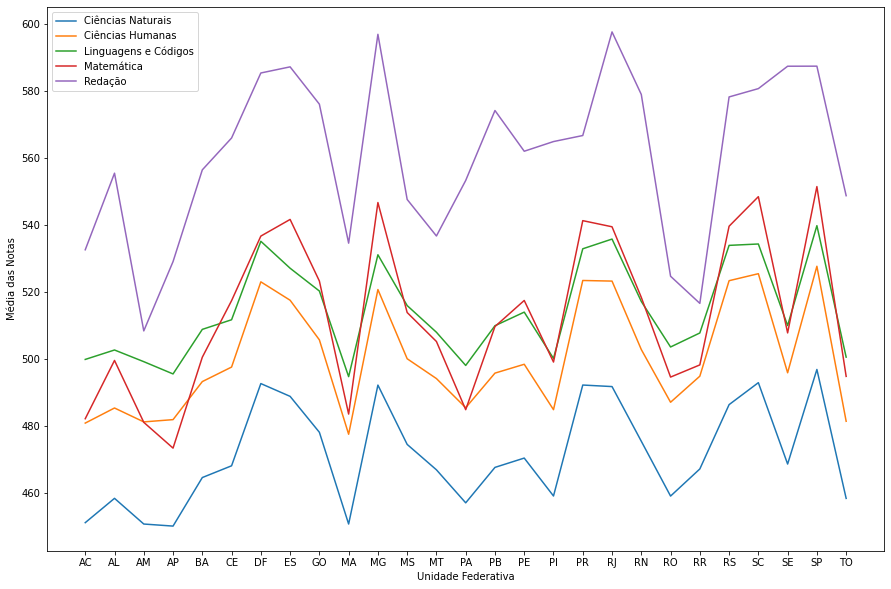

In [10]:
xlabel = dict(states[0]).keys()
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']

for i in range(5):
    y = list()
    for j in range(27):
        y.append(states[i][j])
    plt.plot(xlabel,y)

plt.xlabel("Unidade Federativa")
plt.ylabel("Média das Notas")
plt.legend(title)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Analisando os dados por região, notamos que a região Sudeste detém as melhores médias em todas áreas do conhecimento e redação, sendo SP liderando nas áreas do conhecimento e RJ na redação, seguido pela região Sul com ótimos resultados do estado de SC. Já os estados que estão entre as piores médias, temos MA, AP, AM e AC, compostos da região nordeste e principalmente norte.

#### Examinando o Questionário Socioeconômico

A partir do questionario socioeconômico do ENEM foi analisado a média das notas para cada uma das respostas.

In [ ]:
# O processamento feito a seguir foi salvo no arquivo social-questionnaire.json pois demorou para calcular

'''
i = 1
questionnaire = []

while i <10:
    questionnaire.append([
    df.groupby('Q00'+str(i)).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby('Q00'+str(i)).NU_NOTA_REDACAO.mean().compute().tolist()])
    i = i+1
    print("ok",i)

while i < 26:
    questionnaire.append([
    df.groupby('Q0'+str(i)).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby('Q0'+str(i)).NU_NOTA_REDACAO.mean().compute().tolist()])
    i = i+1
    print("ok",i)

with open('social-questionnaire.json', 'w') as f:
    json.dump(questionnaire, f)

'''

# Lendo os dados que foram pré-processados

with open('social-questionnaire.json') as f:
   questionnaire = json.load(f)

print(questionnaire[0])

[[442.2739791190132, 454.3748427156051, 465.1795835372827, 471.8865770034298, 488.2020397860436, 528.8154217311948, 543.570116097516, 459.78136516703927], [469.7548846658781, 483.9687483165623, 495.4131887496624, 502.1112610691676, 518.7754981418016, 557.278762205226, 570.4682015807325, 489.62588435374147], [485.0112393987948, 500.5247181443891, 511.5388449707332, 518.0072642022582, 531.6112838437356, 559.2797922966262, 567.9815954739461, 507.18218598153544], [466.05376345238045, 486.4077780546843, 505.34442662374227, 515.6984986513664, 538.8768382225314, 600.1926782778664, 624.0266050365607, 495.39633289258586], [486.6628729452756, 524.3027494808495, 549.8694482713377, 566.1103979460847, 597.3121530934098, 667.4245842655957, 694.9726335081402, 526.8423833819242]]


In [ ]:
i = 1
questionnaire = []

while i <10:
    questionnaire.append(df.groupby('Q00'+str(i)).size().compute())
    i = i+1
    #print("ok",i)

while i < 26:
    questionnaire.append(df.groupby('Q0'+str(i)).size().compute())
    i = i+1
    #print("ok",i)

print(questionnaire)

[Q001
A     290615
B    1135816
C     723518
D     586620
E    1308991
F     375721
G     229183
H     444806
dtype: int64, Q002
A     194625
B     854826
C     686198
D     667415
E    1633692
F     513711
G     399470
H     145333
dtype: int64, Q003
A    1092542
B    1079077
C    1203182
D     865524
E     279823
F     575122
dtype: int64, Q004
A     889104
B    2204272
C     349395
D    1023529
E     191505
F     437465
dtype: int64, Q005
1      142014
2      645557
3     1299838
4     1639448
5      830392
6      306841
7      128880
8       55546
9       20920
10      14192
11       4469
12       2916
13       1512
14        749
15        619
16        331
17        183
18        159
19        132
20        572
dtype: int64, Q006
A     232075
B    1273250
C    1311465
D     499616
E     475568
F     226251
G     301922
H     192912
I     143652
J      80789
K      58026
L      44189
M      43300
N      61649
O      50203
P      43254
Q      57149
dtype: int64, Q007
A    4725052
B 

In [ ]:
relativeQuestionnaire = []

for i in questionnaire:
    relativeQuestionnaire.append(i/i.sum())  

relativeQuestionnaire[0]
 

Q001
A    0.057036
B    0.222916
C    0.141998
D    0.115130
E    0.256903
F    0.073739
G    0.044980
H    0.087298
dtype: float64

In [ ]:
quests ='''Q001	Até que série seu pai, ou o homem responsável por você, estudou?
	
		
Q002	Até que série sua mãe, ou a mulher responsável por você, estudou?
	
	
	
	
	
	
Q003	A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
	
	
		
Q004	A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).
	
	
	
	
	
Q005	Incluindo você, quantas pessoas moram atualmente em sua residência?
	
	
	
	
	

	
	
Q006	Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
	
	
	

	
	
	
	
Q007	Em sua residência trabalha empregado(a) doméstico(a)?
	
	
	
Q008	Na sua residência tem banheiro?
	
	
	
	
Q009	Na sua residência tem quartos para dormir?
	
	
	
	
Q010	Na sua residência tem carro?
	
	
	
	
Q011	Na sua residência tem motocicleta?
	
	
	
	
Q012	Na sua residência tem geladeira?
	
	
	
	
Q013	Na sua residência tem freezer (independente ou segunda porta da geladeira)?
	
	
	
	
Q014	Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
	
	
	
	
Q015	Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
	
	
	
	
Q016	Na sua residência tem forno micro-ondas?
	
	
	
	
Q017	Na sua residência tem máquina de lavar louça?
	
	
	
	
Q018	Na sua residência tem aspirador de pó?
	
Q019	Na sua residência tem televisão em cores?
	
	
	
	
Q020	Na sua residência tem aparelho de DVD?
	
Q021	Na sua residência tem TV por assinatura?
	
Q022	Na sua residência tem telefone celular?
	
	
	
	
Q023	Na sua residência tem telefone fixo?
	
Q024	Na sua residência tem computador?
	
	
	
	
Q025	Na sua residência tem acesso à Internet? '''

quests = re.split("\t+|\n+",quests)

i = 0
while i < len(quests):
    if quests[i] == '':
        quests.remove(quests[i])
    else:
        i = i+1


i = 0

dictQuest = {}

while i < len(quests):
    if i%2==0:
        key = quests[i]
    else:
        dictQuest[key] = quests[i]
    i += 1


dictQuest

{'Q001': 'Até que série seu pai, ou o homem responsável por você, estudou?',
 'Q002': 'Até que série sua mãe, ou a mulher responsável por você, estudou?',
 'Q003': 'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).',
 'Q004': 'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).',
 'Q005': 'Incluindo você, quantas pessoas moram atualmente em sua residência?',
 'Q006': 'Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)',
 'Q007': 'Em sua residência trabalha empregado(a) doméstico(a)?',
 'Q008': 'Na sua residên

In [ ]:

answers = '''A	Nunca estudou.
B	Não completou a 4ª série/5º ano do Ensino Fundamental.
C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E	Completou o Ensino Médio, mas não completou a Faculdade.
F	Completou a Faculdade, mas não completou a Pós-graduação.
G	Completou a Pós-graduação.
H	Não sei.
A	Nunca estudou.
B	Não completou a 4ª série/5º ano do Ensino Fundamental.
C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E	Completou o Ensino Médio, mas não completou a Faculdade.
F	Completou a Faculdade, mas não completou a Pós-graduação.
G	Completou a Pós-graduação.
H	Não sei.
A	Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
B	Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
C	Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
D	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
E	Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
F	Não sei.
A	Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
B	Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
C	Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
D	Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
E	Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
F	Não sei.
1	1, pois moro sozinho(a).
2	2
3	3
4	4
5	5
6	6
7	7
8	8
9	9
10	10
11	11
12	12
13	13
14	14
15	15
16	16
17	17
18	18
19	19
20	20
A	Nenhuma renda.
B	Até R$ 998,00.
C	De R$ 998,01 até R$ 1.497,00.
D	De R$ 1.497,01 até R$ 1.996,00.
E	De R$ 1.996,01 até R$ 2.495,00.
F	De R$ 2.495,01 até R$ 2.994,00.
G	De R$ 2.994,01 até R$ 3.992,00.
H	De R$ 3.992,01 até R$ 4.990,00.
I	De R$ 4.990,01 até R$ 5.988,00.
J	De R$ 5.988,01 até R$ 6.986,00.
K	De R$ 6.986,01 até R$ 7.984,00.
L	De R$ 7.984,01 até R$ 8.982,00.
M	De R$ 8.982,01 até R$ 9.980,00.
N	De R$ 9.980,01 até R$ 11.976,00.
O	De R$ 11.976,01 até R$ 14.970,00.
P	De R$ 14.970,01 até R$ 19.960,00.
Q	Mais de R$ 19.960,00.
A	Não.
B	Sim, um ou dois dias por semana.
C	Sim, três ou quatro dias por semana.
D	Sim, pelo menos cinco dias por semana.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.
A	Não.
B	Sim, uma.
C	Sim, duas.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.
A	Não.
B	Sim.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.
A	Não.
B	Sim, um.
C	Sim, dois.
D	Sim, três.
E	Sim, quatro ou mais.
A	Não.
B	Sim.'''

answers = re.split("\t+|\n+",answers)

answers

['A',
 'Nunca estudou.',
 'B',
 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
 'C',
 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
 'D',
 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
 'E',
 'Completou o Ensino Médio, mas não completou a Faculdade.',
 'F',
 'Completou a Faculdade, mas não completou a Pós-graduação.',
 'G',
 'Completou a Pós-graduação.',
 'H',
 'Não sei.',
 'A',
 'Nunca estudou.',
 'B',
 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
 'C',
 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
 'D',
 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
 'E',
 'Completou o Ensino Médio, mas não completou a Faculdade.',
 'F',
 'Completou a Faculdade, mas não completou a Pós-graduação.',
 'G',
 'Completou a Pós-graduação.',
 'H',
 'Não sei.',
 'A',
 'Grupo 1: Lavrador, agricultor sem empregados

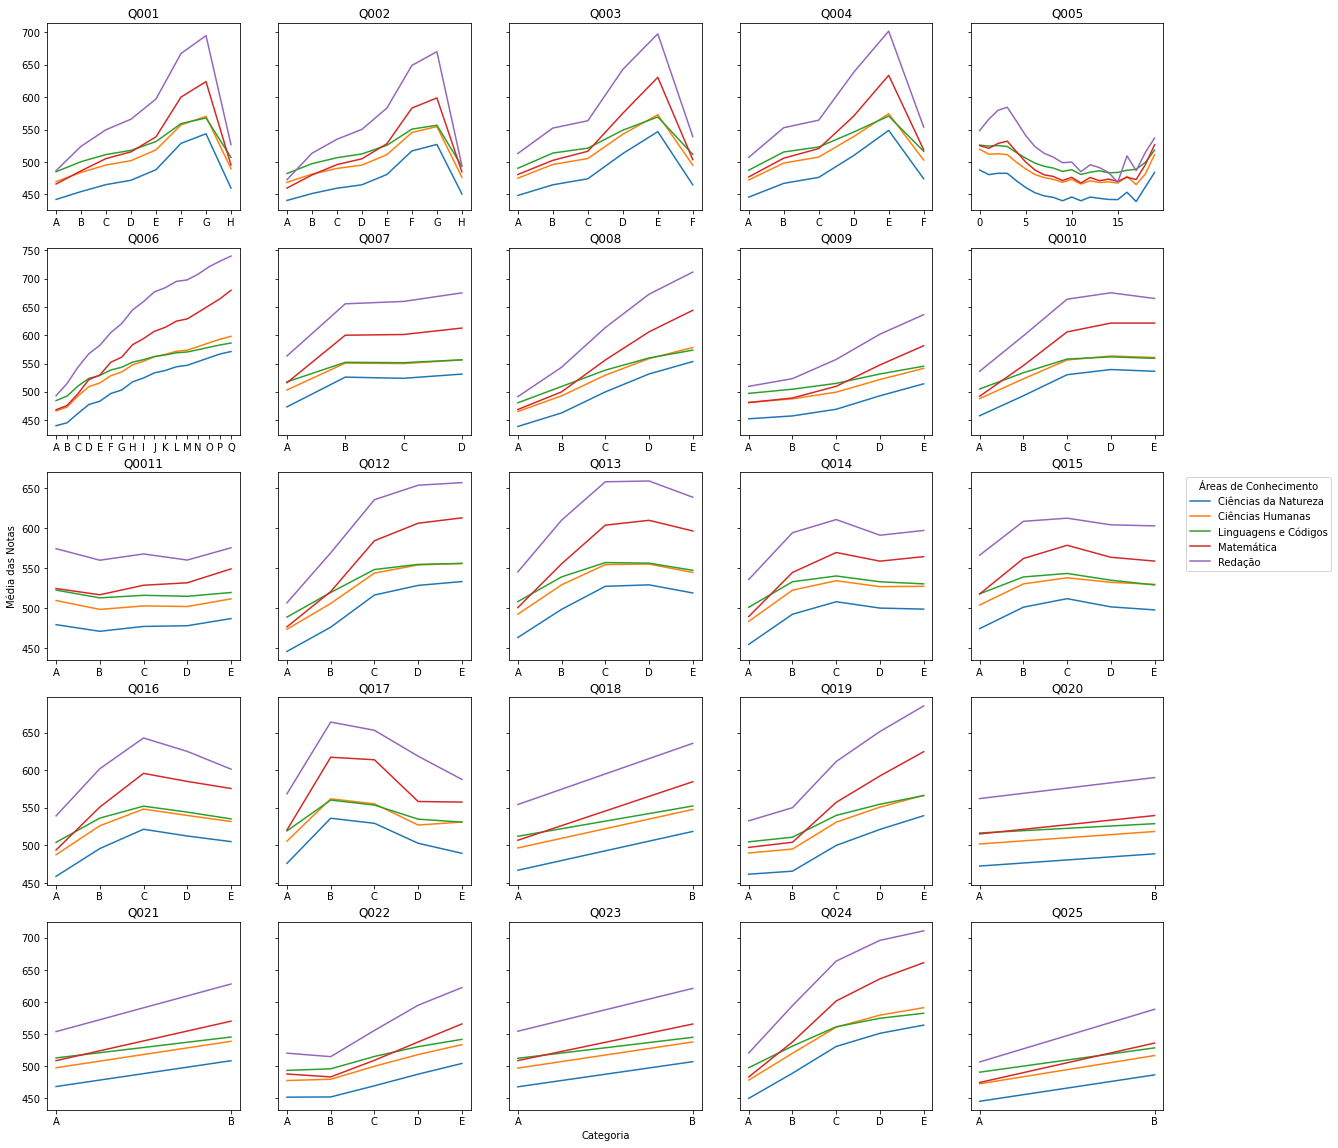

In [ ]:
dfjs = pd.read_json('social-questionnaire.json')

label = ['Ciências da Natureza','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']
Alfabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']

plot1 = np.arange(len(xlabel))

fig, x = plt.subplots(nrows=5, ncols=5, figsize=(20,20), sharey='row')

k=0
for i in range(5):
    for j in range(5):
        n = len(dfjs[0][k])

        if k == 4:
            xlabel = np.arange(len(dfjs[0][k]))
        else:
            xlabel = Alfabet[0:n]

        if k>10:
            title = 'Q0'+str(k+1)
        else:
            title = 'Q00'+str(k+1)

        x[i,j].plot(xlabel,dfjs[0][k])
        x[i,j].plot(xlabel,dfjs[1][k])
        x[i,j].plot(xlabel,dfjs[2][k])
        x[i,j].plot(xlabel,dfjs[3][k])
        x[i,j].plot(xlabel,dfjs[4][k])
        x[i,j].set_title(title)
        
        k+=1

x[2,0].legend(label, bbox_to_anchor=(6.7,1), title='Áreas de Conhecimento')

x[2,0].set_ylabel("Média das Notas")
x[4,2].set_xlabel("Categoria")

plt.show()

Os gráficos acima representam a média das notas de cada área do conhecimento em relação as respostas do questionário socioeconômico. No qual, quanto mais afastado da letra A melhor tende a ser a condição da familía financeiramente na maior parte dos gráficos ou em outros casos, como no Q001, o gráfico representa a escolaridade do pai. No caso do Q005, o valor é numérico, pois representa quantidade de pessoas na residência. Para mais detalhes sobre cada questão, o arquivo `Dicionário_Microdados_Enem_2019` contém as informações.

Analisando os gráficos, notamos que as respostas a média dos alunos tendem a crescer quanto melhor as condições socioeconômicas. Porém há também alguns casos que contradizem, como o Q016, que implica que ao ter um quantidade muito grande de forno micro-ondas, a média das notas tendem a cair.

#### Média das Notas pela Idade

In [11]:
years = [
    df.groupby('NU_IDADE').NU_NOTA_CN.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_CH.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_LC.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_MT.mean().compute(),
    df.groupby('NU_IDADE').NU_NOTA_REDACAO.mean().compute()]

C:\Users\Vinic\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexes\base.py:3080: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(casted_key)


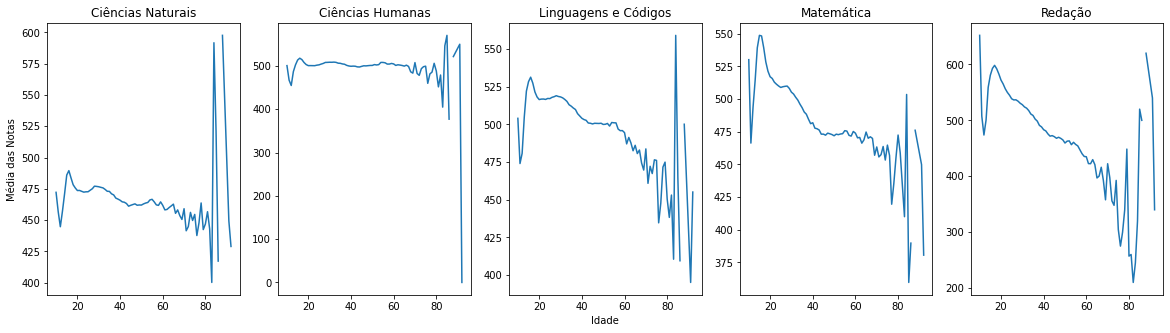

In [14]:
fig, x = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i in range(5):
    xlabel = sorted(dict(years[i]))
    y = list()
    for j in xlabel:
        y.append(years[i][j])
    x[i].plot(xlabel,y)
    x[i].set_title(title[i])


x[2].set_xlabel("Idade")
x[0].set_ylabel("Média das Notas")
plt.show()

Observando os gráficos, temos que de fato a idade que apresenta a melhor média são as pessoas que acabaram de sair da escola, ou seja, em torno de 18 anos. Porém, há alguns outliers, que possivelmente são causados pela quantidade de pessoas daquela idade que realizou a prova, que no caso há três casos principais que se destaca, no qual há duas pessoas acima de 80 anos e uma com provavelmente 10 anos.

#### Média das notas por etnia

In [15]:
etnia = [
    df.groupby('TP_COR_RACA').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_COR_RACA').NU_NOTA_REDACAO.mean().compute()
]

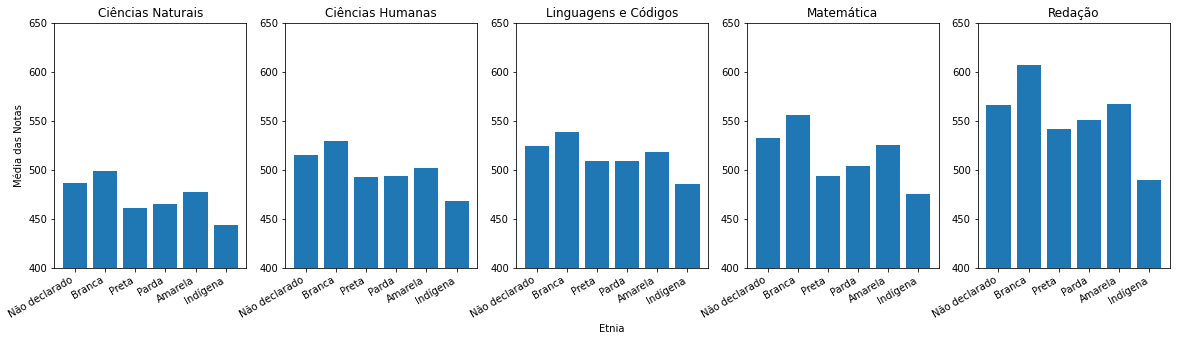

In [16]:
xlabel = ['Não declarado','Branca','Preta','Parda','Amarela','Indígena']
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']

fig, x = plt.subplots(nrows=1, ncols=5, figsize=(20,5))


for i in range(5):
    y = list()
    for j in range(6):
        y.append(etnia[i][j])
    x[i].bar(xlabel,y)
    x[i].set_title(title[i])
    x[i].set_ylim([400,650])


x[2].set_xlabel("Etnia")
x[0].set_ylabel("Média das Notas")
plt.gcf().autofmt_xdate()
plt.show()

Primeiramente vemos que o preconceito de que os asiáticos são mais inteligentes não se aplica nesse caso, pois só observando os gráficos vemos que quem declarou que era branco ou as pessoas que Não declaram, conseguiram obter um méia superior a quem declarou ser amarelo. Além disso, notamos que infelizmente a educação indígena ainda se sai atrás, possivelmente por ainda existir obstáculos significativos que impedem a garantia do direito à educação de qualidade para os jovens indígenas, bem como sua progressão nos estudos.

#### Média das Notas por sexo

In [17]:
sexo = [
    df.groupby('TP_SEXO').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_SEXO').NU_NOTA_REDACAO.mean().compute()
]

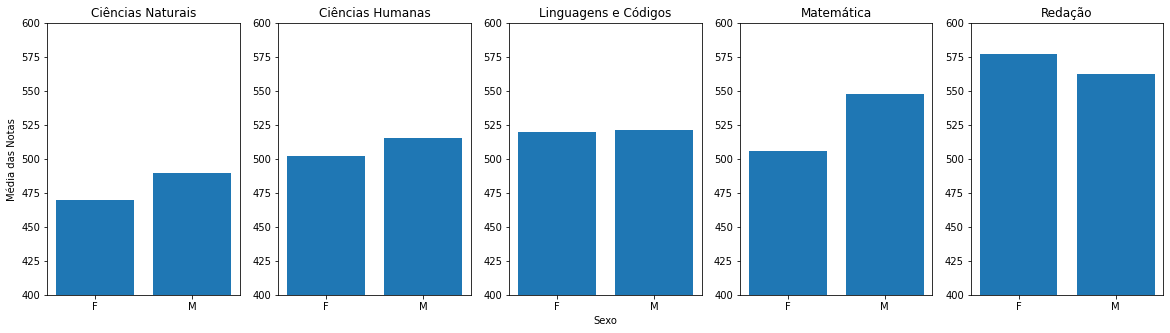

In [18]:
xlabel = ['F','M']
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']
y = list()

fig, x = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i in range(5):
    y = list()
    for j in range(2):
        y.append(sexo[i][j])
    x[i].bar(xlabel,y)
    x[i].set_title(title[i])
    x[i].set_ylim([400,600])


x[2].set_xlabel("Sexo")
x[0].set_ylabel("Média das Notas")
plt.show()

Ao ver as médias das notas do Enem de 2019, a diferença entre homens e mulheres é quase inexistente, com uma diferença maior na área de matemática, em que o sexo masculino se sobressai.

#### Média da notas pelo ano de conclusão

In [19]:
conclusion = [
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_CN.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_CH.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_LC.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_MT.mean().compute(),
    df.groupby('TP_ANO_CONCLUIU').NU_NOTA_REDACAO.mean().compute()
]

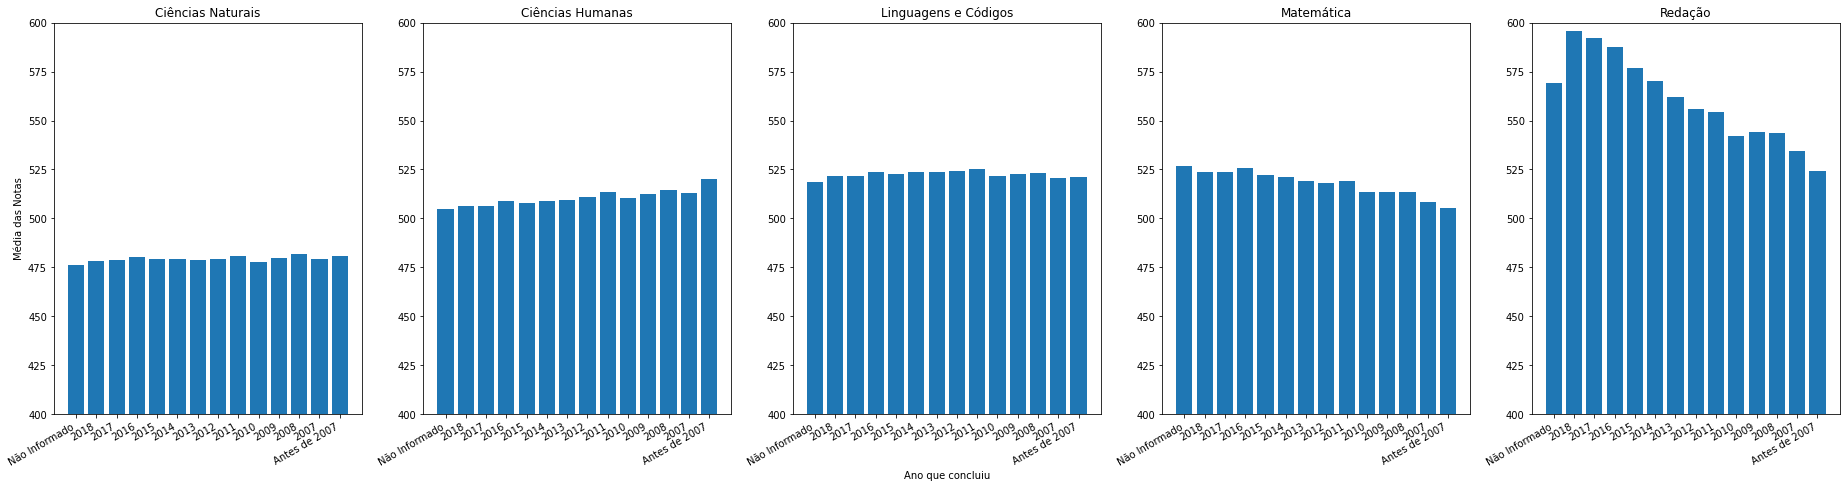

In [21]:
xlabel = ['Não Informado','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','Antes de 2007']
title = ['Ciências Naturais','Ciências Humanas','Linguagens e Códigos','Matemática','Redação']
y = list()

fig, x = plt.subplots(nrows=1, ncols=5, figsize=(32,8))

for i in range(5):
    y = list()
    for j in range(14):
        y.append(conclusion[i][j])
    x[i].bar(xlabel,y)
    x[i].set_title(title[i])
    x[i].set_ylim([400,600])


x[2].set_xlabel("Ano que concluiu")
x[0].set_ylabel("Média das Notas")
plt.gcf().autofmt_xdate()
plt.show()

Surpreendentemente em três áreas do conhecimente há quase nenhuma diferença entre quem acabou de sair da escola para quem já saiu a muito tempo, tirando na Matemática e na Redação.

In [ ]:
# O processamento feito a seguir foi salvo no arquivo social-questionnaire.json pois demorou para calcular

'''
Qespecial = df.iloc[:,28:79].compute()

Qspecial = Qspecial.columns.tolist()
special = []
for i in Qspecial: 
    special.append([
    df.groupby(i).NU_NOTA_CN.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_CH.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_LC.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_MT.mean().compute().tolist(),
    df.groupby(i).NU_NOTA_REDACAO.mean().compute().tolist()])
    print("ok",i)

with open('special-service.json', 'w') as f:
    json.dump(special, f)
    
'''

with open('special-service.json') as f:
   specialService = json.load(f)


print(specialService[0])

[[477.84573324054963, 459.297090069284], [507.2693939688573, 489.527312390925], [520.5448488616103, 497.27373472949387], [523.1673308863785, 486.14106235565816], [571.2581815769058, 511.4921465968586]]


In [ ]:
# Dicionário contendo a variação das médias das notas de um grupo de pessoas com e sem um tipo de deficiência
diffs = {}
especialCol = df.columns.tolist()[28:79]

n = 0

for i in specialService:
    for j in i:
        diffs[especialCol[n]] =(((j[0]-j[1])**2)**0.5)
    n = n+1     

print(diffs)

{'IN_BAIXA_VISAO': 59.76603498004721, 'IN_CEGUEIRA': 54.03334012797575, 'IN_SURDEZ': 240.33063388950546, 'IN_DEFICIENCIA_AUDITIVA': 87.14321108425486, 'IN_SURDO_CEGUEIRA': 141.18942758227263, 'IN_DEFICIENCIA_FISICA': 61.545737577355624, 'IN_DEFICIENCIA_MENTAL': 235.6721021518863, 'IN_DEFICIT_ATENCAO': 118.10151493609794, 'IN_DISLEXIA': 72.7101249361591, 'IN_DISCALCULIA': 47.61810129781861, 'IN_AUTISMO': 104.18901045711641, 'IN_VISAO_MONOCULAR': 5.839867848516747, 'IN_OUTRA_DEF': 29.944920111280112, 'IN_GESTANTE': 55.38703781294009, 'IN_LACTANTE': 52.69982487140169, 'IN_IDOSO': 176.0361570256036, 'IN_ESTUDA_CLASSE_HOSPITALAR': 59.938592368130685, 'IN_SEM_RECURSO': 55.40084649759456, 'IN_BRAILLE': 31.971684190320957, 'IN_AMPLIADA_24': 74.04688666086696, 'IN_AMPLIADA_18': 39.89337726961162, 'IN_LEDOR': 101.89254078342788, 'IN_ACESSO': 68.42326966555049, 'IN_TRANSCRICAO': 79.00365126740132, 'IN_LIBRAS': 244.6678157454067, 'IN_TEMPO_ADICIONAL': 75.60697277941767, 'IN_LEITURA_LABIAL': 19.670

In [ ]:
# i = 1
# Qespecial = df.iloc[:,28:79].compute()
# especial = []

# for i in Qespecial:
#     especial.append(df.groupby(i).size().compute())
#     print("ok",i)


In [ ]:
print(especial[0:5])

[IN_BAIXA_VISAO
0    5089069
1       6201
dtype: int64, IN_CEGUEIRA
0    5094555
1        715
dtype: int64, IN_SURDEZ
0    5093647
1       1623
dtype: int64, IN_DEFICIENCIA_AUDITIVA
0    5093067
1       2203
dtype: int64, IN_SURDO_CEGUEIRA
0    5095223
1         47
dtype: int64]


In [ ]:
sum0 = 0
sum1 = 0
for i in especial:
    sum0 += i[0]
    sum1 += i[1]

print(sum1)
print(sum1/(sum1+sum0))

18271
0.0005976457904422468


In [ ]:
relativeEspecial = []

for i in especial:
    relativeEspecial.append(i/i.sum())  

print(relativeEspecial[0:5])

[IN_BAIXA_VISAO
0    0.998783
1    0.001217
dtype: float64, IN_CEGUEIRA
0    0.99986
1    0.00014
dtype: float64, IN_SURDEZ
0    0.999681
1    0.000319
dtype: float64, IN_DEFICIENCIA_AUDITIVA
0    0.999568
1    0.000432
dtype: float64, IN_SURDO_CEGUEIRA
0    0.999991
1    0.000009
dtype: float64]


Em nossa análise percebemos que a quantidade de pessoas que marcaram sim no questionário de serviços especiais é baixo quando comparada a quantidade de estudantes (menor que 1%). Além disso, observamos que a nota da maioria dessas classificações não é tão distinta. A diferença média é 70 pontos na nota.

## III. Data Preparation

+ Select data:   
+ Clean data:   
+ Construct data/transform data/feature engineering:   
+ Integrate data:   
+ (Re) Format data:   

In [3]:
especialCol = df.columns.tolist()[28:79]

df = df.drop(especialCol, axis=1)
print(df.head())

   NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
0  190001595656    2019                  3552205                Sorocaba   
1  190001421546    2019                  2910800        Feira de Santana   
2  190001133210    2019                  2304400               Fortaleza   
3  190001199383    2019                  1721000                  Palmas   
4  190001237802    2019                  3118601                Contagem   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                35               SP      36.0       M                1   
1                29               BA      23.0       M                1   
2                23               CE      39.0       F                1   
3                17               TO      25.0       F                1   
4                31               MG      22.0       F                1   

   TP_COR_RACA  ...  Q016  Q017 Q018  Q019 Q020  Q021  Q022  Q023  Q024  Q025  
0           

Neste dataframe é perceptível algumas informações desnecessárias, como por exemplo o ano que foi prestado o vestibular, literalmente todos as pessoas desta base de dados realizaram o ENEM no ano de 2019. 

<!-- Além disso, para o nosso modelo vamos remover as pessoas que precisaram de alguma assistência para realizar a prova, p -->

In [4]:
df = df.dropna(subset=["NU_NOTA_REDACAO", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT"])


df = df.drop(["NU_INSCRICAO",
    "NU_ANO",
    "NO_MUNICIPIO_RESIDENCIA",
    "SG_UF_RESIDENCIA",
    "TP_NACIONALIDADE",
    "CO_MUNICIPIO_NASCIMENTO",
    "NO_MUNICIPIO_NASCIMENTO",
    "CO_UF_NASCIMENTO",
    "SG_UF_NASCIMENTO",
    "TP_SIT_FUNC_ESC",
    "CO_MUNICIPIO_PROVA",
    "NO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "SG_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "CO_PROVA_CN",
    "CO_PROVA_CH",
    "CO_PROVA_LC",
    "CO_PROVA_MT",
    ],
    axis=1)

print(df.head())

   CO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  NU_IDADE TP_SEXO  \
3                  1721000                17      25.0       F   
4                  3118601                31      22.0       F   
5                  5107602                51      37.0       M   
6                  2924009                29      22.0       F   
9                  3550308                35      17.0       M   

   TP_ESTADO_CIVIL  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
3                1            1                1                4          1   
4                1            1                1                4          1   
5                2            2                1               13          1   
6                1            3                1                5          1   
9                1            1                2                0          2   

   TP_ENSINO  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
3        NaN  ...     A     A     A    C    

Como o número de pessoas com necessidade especial comparado ao total de pessoas é muito baixo, não será necessário excluir as pessoas que por sua vez possuem qualquer tipo de necessidade especial, já que as seus valores não irão afetar em nossa modelagem. Porém, como não iremos utilizar essa informação, estaremos removendo essas colunas.

In [5]:
df = df.dropna(subset=['NU_IDADE'])
df = df.compute()
print(df.head())
print(len(df))

   CO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  NU_IDADE TP_SEXO  \
3                  1721000                17      25.0       F   
4                  3118601                31      22.0       F   
5                  5107602                51      37.0       M   
6                  2924009                29      22.0       F   
9                  3550308                35      17.0       M   

   TP_ESTADO_CIVIL  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
3                1            1                1                4          1   
4                1            1                1                4          1   
5                2            2                1               13          1   
6                1            3                1                5          1   
9                1            1                2                0          2   

   TP_ENSINO  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
3        NaN  ...     A     A     A    C    

In [6]:
moreComuns = []
moreComuns.append(df["Q001"].mode().tolist())
moreComuns.append(df["Q002"].mode().tolist())
moreComuns.append(df["Q003"].mode().tolist())
moreComuns.append(df["Q004"].mode().tolist())

In [7]:
for i in range(4):
    moreComuns[i] = moreComuns[i][0]

moreComuns

['E', 'E', 'C', 'B']

In [8]:
def sub(x,n,str):
    if x == str:
        return moreComuns[n]
    else:
        return x

df["Q001"] = df["Q001"].map(lambda x: sub(x,0,"H") )

df["Q002"] = df["Q002"].map(lambda x: sub(x,1,"H") )

df["Q003"] = df["Q002"].map(lambda x: sub(x,2,"F") )

df["Q003"] = df["Q002"].map(lambda x: sub(x,3,"F") )

In [9]:
cols = df.columns.tolist()[38:]

def subs(x,j):
    return j[x]

for c in cols:
    uni = df[c].unique()
    m = len(uni)
    j = {}
    x = 0
    for i in uni:
        if x != m-1:
            j[i] = x/(m)   
        else:
            j[i] = 1
        x = x+1
    df[c] = df[c].map(lambda x: subs(x,j) )

In [10]:
def MF_to_01(x):
    if x == "F":
        return 0
    else:
        return 1
sex = list(map(lambda x: MF_to_01(x),df["TP_SEXO"].tolist()))
df["TP_SEXO"] = sex

df.head()

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,1721000,17,25.0,0,1,1,1,4,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3118601,31,22.0,0,1,1,1,4,1,1.0,...,0.2,0.0,0.0,0.2,0.0,1.0,0.2,1.0,0.0,0.0
5,5107602,51,37.0,1,2,2,1,13,1,NaN,...,0.2,0.0,0.0,0.2,0.0,1.0,0.4,0.0,0.0,0.0
6,2924009,29,22.0,0,1,3,1,5,1,1.0,...,0.0,0.0,0.0,0.2,0.0,1.0,0.6,0.0,0.2,1.0
9,3550308,35,17.0,1,1,1,2,0,2,1.0,...,0.2,0.0,0.0,0.2,0.0,0.0,0.2,1.0,0.0,0.0


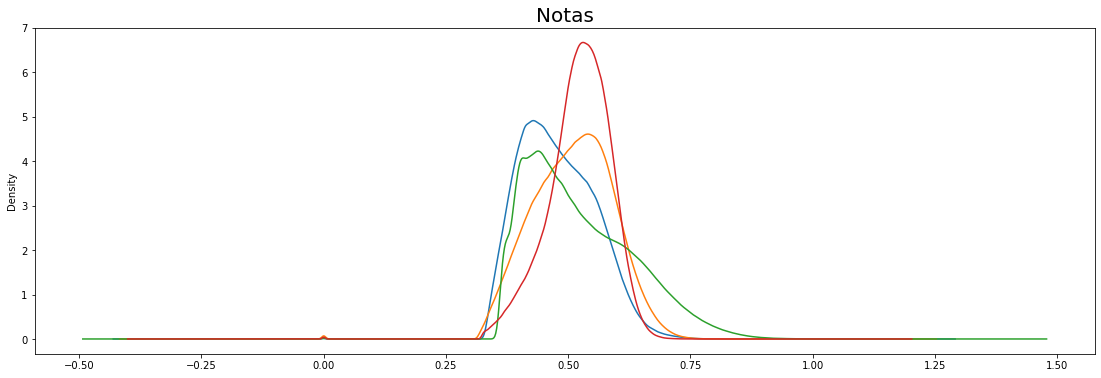

In [11]:
#from sklearn.preprocessing import StandardScaler
df["NU_NOTA_REDACAO"] = df["NU_NOTA_REDACAO"].map(lambda x: x/1000)

def nota_norm(x):
    x = x/1000
    return x


for c in ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC"]:
    df[c] = df[c].map(lambda x: nota_norm(x))
    df[c].plot.density(fontsize=10,figsize=(19, 6))
    plt.title("Notas", size = 20)

    

Text(0.5, 1.0, 'Notas')

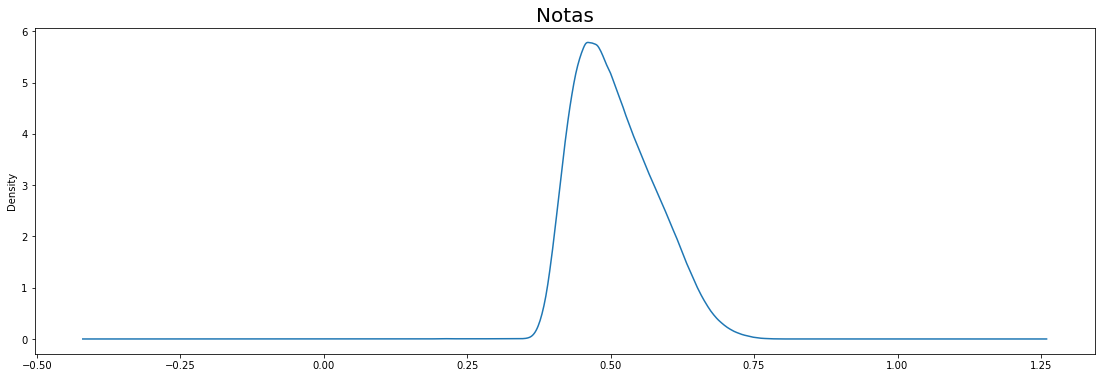

In [12]:
nota = df[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC"]]

df["NOTA_MEDIA"] = nota.sum(axis=1)/4

df["NOTA_MEDIA"].plot.density(fontsize=10,figsize=(19, 6))
plt.title("Notas", size = 20)


In [13]:
nota = df[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC"]]
df = df[(nota > 0).all(axis=1)]

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

columns = ["TP_ESCOLA","TP_ESTADO_CIVIL","TP_COR_RACA"]

for c in columns:
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[c]]).toarray())
    encoder_df.columns = list(map(lambda x: c + "-" + str(x),encoder_df.columns.tolist()))
    df = df.join(encoder_df)
    df.drop(c, axis=1, inplace=True)
    print("ok")

ok
ok
ok


<AxesSubplot:>

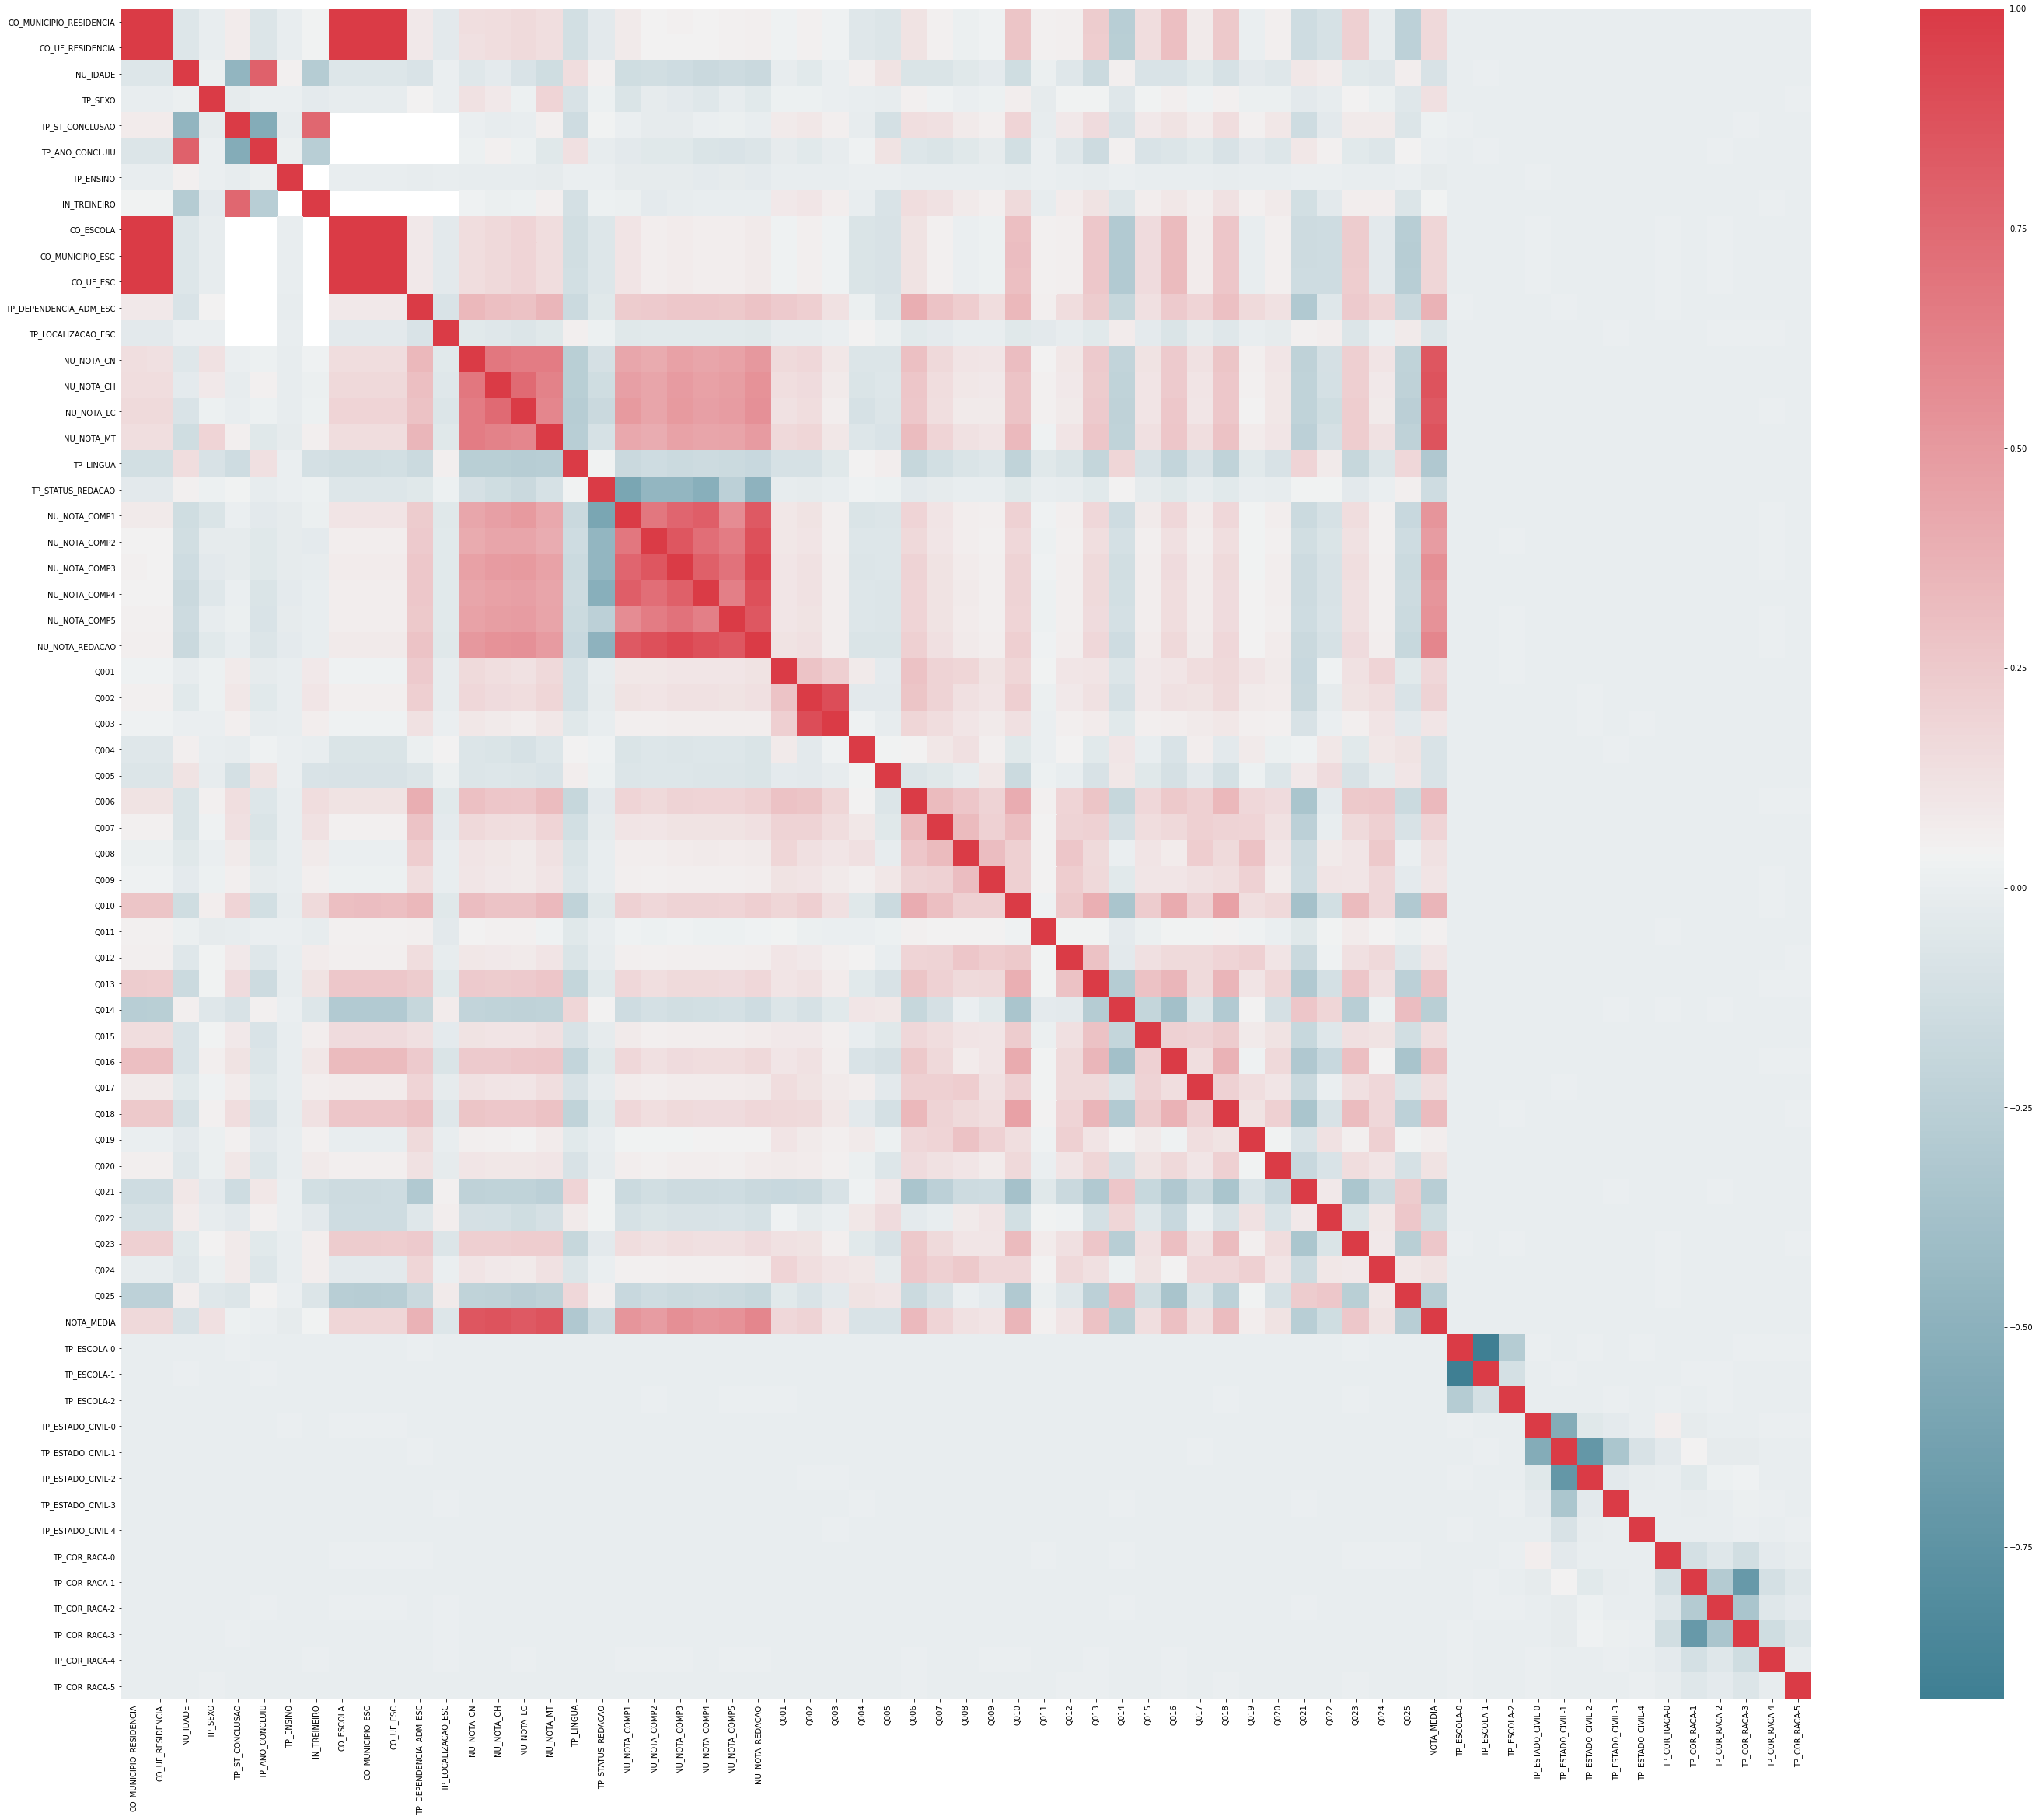

In [15]:
f, ax = plt.subplots(figsize=(50, 40))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [16]:
df.var()

CO_MUNICIPIO_RESIDENCIA    9.770287e+11
CO_UF_RESIDENCIA           9.709514e+01
NU_IDADE                   4.828490e+01
TP_SEXO                    2.410358e-01
TP_ST_CONCLUSAO            5.370704e-01
                               ...     
TP_COR_RACA-1              2.336737e-01
TP_COR_RACA-2              1.085492e-01
TP_COR_RACA-3              2.479520e-01
TP_COR_RACA-4              2.180607e-02
TP_COR_RACA-5              5.822352e-03
Length: 65, dtype: float64

In [17]:
df.to_csv('ENEM_data_for_modeling.csv')

#### Feature Impotances

In [6]:
df = pd.read_csv('ENEM_data_for_modeling.csv')

In [8]:
t = []
t = ['CO_MUNICIPIO_RESIDENCIA','NU_IDADE','TP_ANO_CONCLUIU','TP_SEXO',"IN_TREINEIRO"]
t.extend(df.columns.tolist()[36:61])
t.extend(df.columns.tolist()[62:])

redacaoY = df["NU_NOTA_REDACAO"]
redacaoX = df[t]
xtrain, xtest, ytrain, ytest = train_test_split(redacaoX,redacaoY,test_size=0.3)

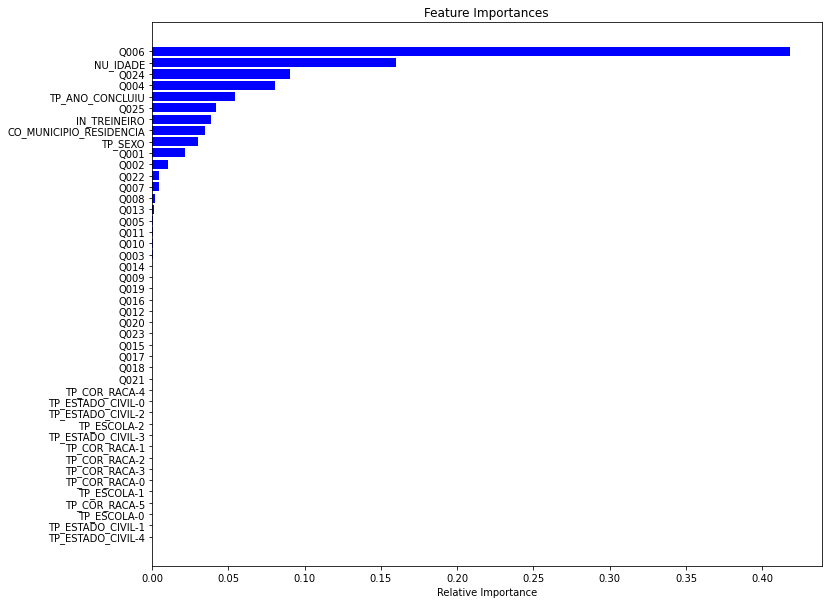

In [9]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(xtrain,ytrain)
features = xtrain.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

Para a seleção dos modelos, vamos trabalhar com menos dados. O arquivo "0.01_ENEM.csv" que contém aproximadamente 10% dos dados, que foram selecionadas pelo script "lessData.py"

In [3]:
df = pd.read_csv("0.01_ENEM.csv")

In [3]:
df.head()

,Unnamed: 0,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,...,TP_ESTADO_CIVIL-1,TP_ESTADO_CIVIL-2,TP_ESTADO_CIVIL-3,TP_ESTADO_CIVIL-4,TP_COR_RACA-0,TP_COR_RACA-1,TP_COR_RACA-2,TP_COR_RACA-3,TP_COR_RACA-4,TP_COR_RACA-5
0,0,4304606,43,19.0,0,2,0,1.0,0,43038662.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,3201209,32,18.0,0,2,0,1.0,0,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,2704500,27,21.0,1,1,1,NaN,0,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,3530805,35,17.0,0,2,0,1.0,0,35020618.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,2103000,21,20.0,0,2,0,1.0,0,21160040.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
df.columns.tolist()

['Unnamed: 0',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TP_LINGUA',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'NOTA_MEDIA',
 'TP_ESCOLA-0',
 'TP_ESCOLA-1',
 'TP_ESCOLA-2',
 'TP_ESTADO_CIVIL-0',
 'TP_ESTADO_CIVIL-1',
 'TP_ESTADO_

Primeiramente, vamos modelar, a partir dos dados pessoais e dos dados socio-econômicos dos vestibulandos do ENEM.

In [4]:
# Selecão das colunas que serão usadas para a modelagem numérica.

t = []
t = ['CO_MUNICIPIO_RESIDENCIA','NU_IDADE','TP_ANO_CONCLUIU','TP_SEXO',"IN_TREINEIRO"]
t.extend(df.columns.tolist()[36:61])
t.extend(df.columns.tolist()[62:])
print(t)

['CO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_SEXO', 'IN_TREINEIRO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'TP_ESCOLA-0', 'TP_ESCOLA-1', 'TP_ESCOLA-2', 'TP_ESTADO_CIVIL-0', 'TP_ESTADO_CIVIL-1', 'TP_ESTADO_CIVIL-2', 'TP_ESTADO_CIVIL-3', 'TP_ESTADO_CIVIL-4', 'TP_COR_RACA-0', 'TP_COR_RACA-1', 'TP_COR_RACA-2', 'TP_COR_RACA-3', 'TP_COR_RACA-4', 'TP_COR_RACA-5']


In [5]:
# Seleção dos dados teste e treino 

redacaoY = df["NU_NOTA_REDACAO"]
redacaoX = df[t]
xtrain, xtest, ytrain, ytest = train_test_split(redacaoX,redacaoY,test_size=0.3)

In [6]:
len(redacaoY)

371433

In [7]:
print(len(xtrain))

260003


In [7]:
# Adicionado os modelos do scikit-learning

seed = 0
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('RIDGE', Ridge(random_state=seed)))
models.append(('RIDGECV', RidgeCV()))
models.append(('MLPR', MLPRegressor(random_state=seed)))
models.append(('SGDR', SGDRegressor()))

print(models)

[('LR', LinearRegression()), ('LASSO', Lasso(random_state=0)), ('EN', ElasticNet(random_state=0)), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor(random_state=0)), ('RIDGE', Ridge(random_state=0)), ('RIDGECV', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))), ('MLPR', MLPRegressor(random_state=0)), ('SGDR', SGDRegressor())]


In [10]:
results = []
names = []
times = []
for name, model in models:
    t0 = time.time()
    md = model.fit(xtrain,ytrain)
    t = time.time() - t0
    ypredict = md.predict(xtest)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append(name)
    times.append(t)
    print(name, t, scores)

LR 4.248426675796509 [0.143132312968984, 0.14313353517109784, 0.12477054370747227, 0.7714432918830956]
LASSO 0.4597623348236084 [0.0034233359109492323, 0.003427498659806627, 0.13323176169638884, 0.603047604380997]
EN 0.5031793117523193 [0.003423349027740996, 0.003427511769779068, 0.13323177370904246, 0.6030487379751661]
KNN 0.08298707008361816 [-0.009028229087686412, -0.008695620399559179, 0.13855249035268777, 0.8959999999999999]
CART 8.72374153137207 [-0.7132619596833496, -0.7126597140539614, 0.18126088127075296, 0.98]


C:\Users\Vinic\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.9274e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


RIDGE 1.6589269638061523 [0.14313250096645447, 0.14313372340589192, 0.12477034263286647, 0.7714251689616906]
RIDGECV 2.088801383972168 [-5403.696729759555, -5403.694634744932, 10.422993974259114, 30.77305275375181]
MLPR 256.2125241756439 [-23.311137555182487, -13.693069289450648, 0.7245519762122271, 3.280533219555144]
SGDR 69.77414011955261 [-7.204959618793804e+40, -6.712399269237106e+39, 4.6832393363658195e+19, 8.060823504392182e+19]


Utilizando um modelo polinomial para os modelos usados.

In [11]:
# Regressão Polinomial grau 2

poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(xtrain)
X_poly_test = poly_reg.fit_transform(xtest)
poly_reg.fit(X_poly,ytrain)

for name, model in models:
    t0 = time.time()
    md = model.fit(X_poly,ytrain)
    time1 = time.time() - t0
    ypredict = md.predict(X_poly_test)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append(name)
    times.append(time1)
    print(name, time1, scores)


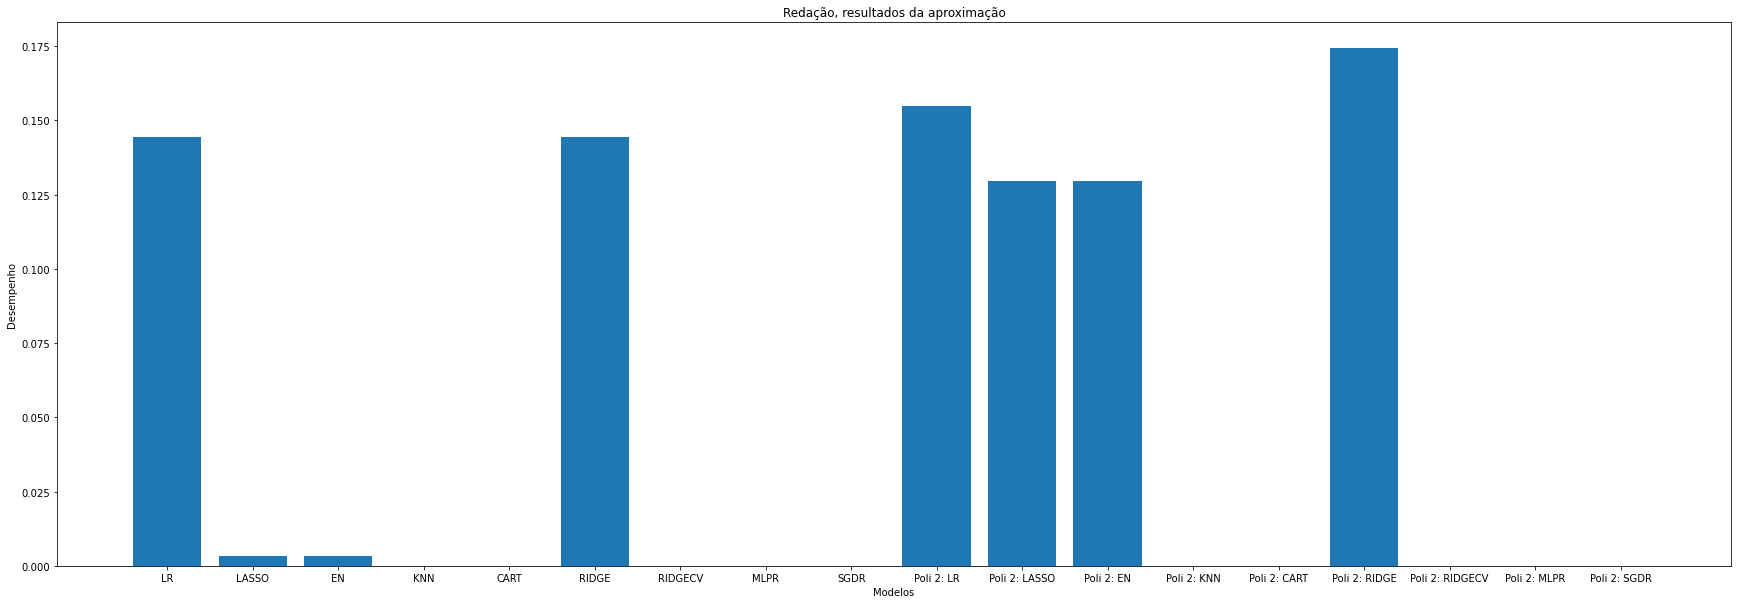

In [42]:
r = []
j = 0
namesCorr = []
for i in results:
    if j < len(results)/2:
        namesCorr.append(names[j])
    else:
        namesCorr.append("Poli 2: "+names[j])
    if i[0] > 0:
        r.append(i[0])
    else:
        r.append(0)
    j = j+1

plt.figure(figsize=(30, 10))
plt.bar(namesCorr,r)
plt.title('Redação, resultados da aproximação')
plt.xlabel('Modelos')
plt.ylabel('Desempenho')
plt.show()

### Lasso Algorithm tuning

In [10]:
alpha_values = [0.000001,0.00002,0.0004,0.002,15]
best_score = -2
for alpha in range(len(alpha_values)):
    model = Lasso(alpha=alpha_values[alpha] ,random_state=seed)
    md = model.fit(xtrain,ytrain)
    ypredict = md.predict(xtest)
    score_new = r2_score(ytest,ypredict)
    if score_new < best_score:
        print(f'R^2: {score_new} with alpha: {alpha_values[alpha]}')
    else:
        if alpha > 0:
            print(f'R^2: {best_score} with alpha: {best_alpha}')
        best_score = score_new
        best_alpha = alpha_values[alpha]
print(f'Best: R^2: {best_score} with alpha: {best_alpha}')

R^2: 0.14357239277662925 with alpha: 1e-06
R^2: 0.14081463103691483 with alpha: 0.0004
R^2: 0.12270531521204808 with alpha: 0.002
R^2: 0.0032664969866411653 with alpha: 15
Best: R^2: 0.1436169677083533 with alpha: 2e-05


### ElasticNet Algorithm tuning

In [11]:
l1_values = [1e-07,1e-05,15]
best_score = -2
for l1 in range(len(l1_values)):
    model = Lasso(alpha=l1_values[l1] ,random_state=seed)
    md = model.fit(xtrain,ytrain)
    ypredict = md.predict(xtest)
    score_new = r2_score(ytest,ypredict)
    if score_new < best_score:
        print(f'R^2: {score_new} with alpha: {l1_values[l1]}')
    else:
        if l1 > 0:
            print(f'R^2: {best_score} with alpha: {best_l1}')
        best_score = score_new
        best_l1 = l1_values[l1]
print(f'Best: R^2: {best_score} with alpha: {best_l1}')

R^2: 0.14356838172655617 with alpha: 1e-07
R^2: 0.0032664969866411653 with alpha: 15
Best: R^2: 0.14360219847836864 with alpha: 1e-05


### KNN Algorithm tuning

In [16]:
k_values = [31,33,35,37,39,41,43]
best_score = -2
for k in range(len(k_values)): 
    model = KNeighborsRegressor(n_neighbors=k_values[k])
    md = model.fit(xtrain,ytrain)
    ypredict = md.predict(xtest)
    score_new = r2_score(ytest,ypredict)
    if score_new < best_score:
        print(f'R^2: {score_new} with k_neighbors: {k_values[k]}')
    else:
        if k > 0:
            print(f'R^2: {best_score} with k_neighbors: {best_k}')
        best_score = score_new
        best_k = k_values[k]
print(f'Best: R^2: {best_score} with k_neighbors: {best_k}')

R^2: 0.0668110464244539 with k_neighbors: 31
R^2: 0.06720193404168462 with k_neighbors: 33
R^2: 0.06767955250266056 with k_neighbors: 37
R^2: 0.06759312070420109 with k_neighbors: 39
R^2: 0.06748775026518539 with k_neighbors: 41
R^2: 0.0678448443710219 with k_neighbors: 35
Best: R^2: 0.06793737235374775 with k_neighbors: 43


### Decision Tree Regression Algorithm turning

In [78]:
num_folds = 10
score = 'r2'
seed = 0
max_depth = [3,5,10,15,20,30,None]
min_samples_split_values = randint(32,128)
min_samples_leaf_values = randint(32,128)

param_distributions = dict(max_depth=max_depth, min_samples_split=min_samples_split_values, min_samples_leaf=min_samples_leaf_values)
model = DecisionTreeRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter= 32, scoring=score, cv=kfold)
grid_result = grid.fit(xtrain, ytrain)


print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean} ({stdev}) with: {param}')

Best: 0.15731369484149765 using {'max_depth': 10, 'min_samples_leaf': 68, 'min_samples_split': 91}
0.1401965089002576 (0.009378800128730819) with: {'max_depth': 15, 'min_samples_leaf': 49, 'min_samples_split': 77}
0.14950568139998333 (0.010871892403325109) with: {'max_depth': 15, 'min_samples_leaf': 68, 'min_samples_split': 102}
0.1313238266321735 (0.008676238390642691) with: {'max_depth': 5, 'min_samples_leaf': 96, 'min_samples_split': 124}
0.13140691825642045 (0.00857006026408729) with: {'max_depth': 5, 'min_samples_leaf': 61, 'min_samples_split': 94}
0.10541539913265532 (0.006730750710325951) with: {'max_depth': 3, 'min_samples_leaf': 59, 'min_samples_split': 121}
0.15553672837974605 (0.010056734691710634) with: {'max_depth': 15, 'min_samples_leaf': 112, 'min_samples_split': 32}
0.15520451402199892 (0.009392629548803674) with: {'max_depth': 10, 'min_samples_leaf': 53, 'min_samples_split': 63}
0.10541539913265532 (0.006730750710325951) with: {'max_depth': 3, 'min_samples_leaf': 120, 

### Ridge Algorithm tuning

In [79]:
alpha_values = [0, 1, 10, 20, 50, 80, 100, 120, 200, 500]
best_score = -2
for alpha in range(len(alpha_values)):
    model = Ridge(alpha=alpha_values[alpha] ,random_state=seed)
    md = model.fit(xtrain,ytrain)
    ypredict = md.predict(xtest)
    score_new = r2_score(ytest,ypredict)
    if score_new < best_score:
        print(f'R^2: {score_new} with alpha: {alpha_values[alpha]}')
    else:
        if alpha > 0:
            print(f'R^2: {best_score} with alpha: {best_alpha}')
        best_score = score_new
        best_alpha = alpha_values[alpha]
print(f'Best: R^2: {best_score} with alpha: {best_alpha}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44533e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


R^2: 0.14837495369218245 with alpha: 1
R^2: 0.14835023545024906 with alpha: 10
R^2: 0.14831876710634972 with alpha: 20
R^2: 0.14820396233307653 with alpha: 50
R^2: 0.14806643201146552 with alpha: 80
R^2: 0.1479657608959124 with alpha: 100
R^2: 0.14785971451351898 with alpha: 120
R^2: 0.14740171413901404 with alpha: 200
R^2: 0.14558037919102096 with alpha: 500
Best: R^2: 0.14837746955392217 with alpha: 0


### Plotting the tunned algorithms

In [11]:
seed = 0
num_folds = 10
score = 'r2'

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Opt LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(alpha=0.00002, random_state=seed))])))
pipelines.append(('Opt EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(l1_ratio=1e-05, random_state=seed))])))
pipelines.append(('Opt KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=43))])))
pipelines.append(('Opt CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(max_depth=10,
                                                                                                           min_samples_leaf=68,
                                                                                                           min_samples_split=91,
                                                                                                           random_state=seed))])))
pipelines.append(('Opt RIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge(alpha=0, random_state=seed))])))
pipelines.append(('RIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.143828 (0.004210)
Opt LASSO: 0.143847 (0.004214)
Opt EN: 0.113589 (0.002734)
Opt KNN: 0.124423 (0.003998)
Opt CART: 0.173959 (0.005368)
Opt RIDGE: 0.143837 (0.004224)
RIDGECV: 0.143844 (0.004221)


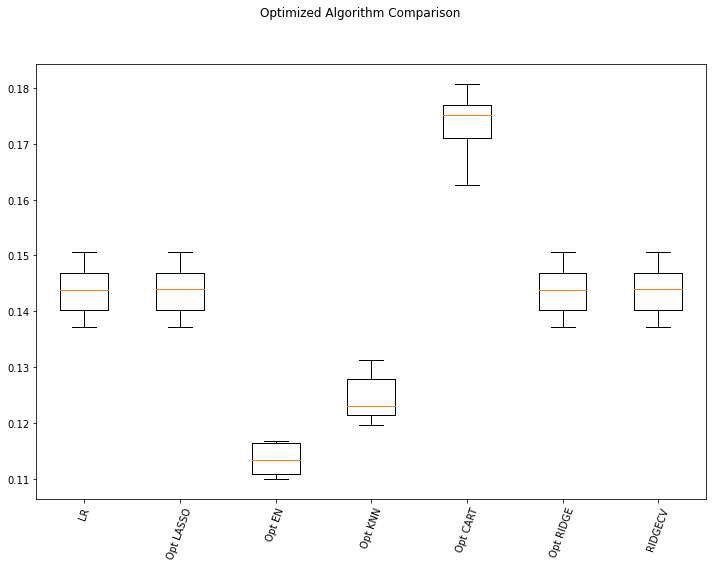

In [12]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Optimized Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=70)
plt.show()

A seguir vamos estimar a nota média das provas objetivas, utilizando o mesmo método anterior.

In [57]:
t = []
t = ['CO_MUNICIPIO_RESIDENCIA','NU_IDADE','TP_ANO_CONCLUIU','TP_SEXO',"IN_TREINEIRO"]
t.extend(df.columns.tolist()[36:61])
t.extend(df.columns.tolist()[62:])
print(t)
len(t)

['CO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_SEXO', 'IN_TREINEIRO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'TP_ESCOLA-0', 'TP_ESCOLA-1', 'TP_ESCOLA-2', 'TP_ESTADO_CIVIL-0', 'TP_ESTADO_CIVIL-1', 'TP_ESTADO_CIVIL-2', 'TP_ESTADO_CIVIL-3', 'TP_ESTADO_CIVIL-4', 'TP_COR_RACA-0', 'TP_COR_RACA-1', 'TP_COR_RACA-2', 'TP_COR_RACA-3', 'TP_COR_RACA-4', 'TP_COR_RACA-5']


44

In [48]:
y = df["NOTA_MEDIA"]
X = df[t]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

In [51]:
seed = 0
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('RIDGE', Ridge(random_state=seed)))
models.append(("Tweedie",TweedieRegressor()))
models.append(('RIDGECV', RidgeCV()))
models.append(('MLPR', MLPRegressor(random_state=seed)))
models.append(('SGDR', SGDRegressor()))

print(models)

[('LR', LinearRegression()), ('LASSO', Lasso(random_state=0)), ('EN', ElasticNet(random_state=0)), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor(random_state=0)), ('RIDGE', Ridge(random_state=0)), ('Tweedie', TweedieRegressor()), ('RIDGECV', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))), ('MLPR', MLPRegressor(random_state=0)), ('SGDR', SGDRegressor())]


In [52]:
results = []
names = []
times = []
for name, model in models:
    t0 = time.time()
    md = model.fit(xtrain,ytrain)
    t = time.time() - t0
    ypredict = md.predict(xtest)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append(name)
    times.append(t)
    print(name, t, scores)

LR 0.3369927406311035 [0.28081222248359594, 0.2808122897712646, 0.04786404008560746, 0.2611457220594433]
LASSO 0.20499753952026367 [0.030266548479329303, 0.03026660499855094, 0.056531799117737536, 0.2933549551322375]
EN 0.24100041389465332 [0.03026664345124297, 0.03026669996392084, 0.05653178217511472, 0.29335471658962753]
KNN 0.055986881256103516 [0.1243136964005892, 0.1281622060625076, 0.052270104505070455, 0.28989000000000004]
CART 4.1136698722839355 [-0.3279511120482199, -0.32773666392093626, 0.06380101790361661, 0.35102500000000003]
RIDGE 0.12395071983337402 [0.2808123309389584, 0.2808123978728895, 0.04786412728734515, 0.261150924969782]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92471e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Tweedie 1.1233956813812256 [0.13662615699271685, 0.13662618600107912, 0.05327905251095387, 0.27240916785344405]
RIDGECV 0.7869675159454346 [0.1896162979043382, 0.18961641226799208, 0.050311105318781184, 0.27819126516225756]
MLPR 46.76713824272156 [-13.751827319287235, -13.285695579054646, 0.2092871566341236, 1.632693715226878]
SGDR 59.4031503200531 [-1.230916092175413e+40, -1.1457302413419965e+39, 7.420498518636218e+18, 1.2776048182510905e+19]


In [53]:
# Regressão Polinomial grau 2

poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(xtrain)
X_poly_test = poly_reg.fit_transform(xtest)
poly_reg.fit(X_poly,ytrain)

for name, model in models:
    t0 = time.time()
    md = model.fit(X_poly,ytrain)
    time1 = time.time() - t0
    ypredict = md.predict(X_poly_test)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append("Poli 2: "+name)
    times.append(time1)
    print(name, time1, scores)


LR 21.447330474853516 [0.3209559989516836, 0.3209561056160619, 0.046341773253408575, 0.27349612433070813]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.6753272065783, tolerance: 0.12919289764515662
  model = cd_fast.enet_coordinate_descent(


LASSO 167.73866438865662 [0.2638195827694553, 0.2638201812298111, 0.04854324384033893, 0.264212409384153]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.6449903125095, tolerance: 0.12919289764515662
  model = cd_fast.enet_coordinate_descent(


EN 274.8908841609955 [0.2638206852878664, 0.2638212842927763, 0.048543029132044245, 0.2642102363953668]
KNN 0.8520054817199707 [0.12423248035211298, 0.12809514544327716, 0.052275023288162976, 0.28989000000000004]
CART 293.50022768974304 [-0.32127629905316524, -0.3209991031132977, 0.06367188242244758, 0.340625]
RIDGE 78.66138100624084 [0.3322842973608875, 0.33228464348236564, 0.04597760042353373, 0.2594223037788508]
Tweedie 10.352788925170898 [0.023270023514663674, 0.02375925193594275, 0.056916797749112076, 0.29917647851752505]
RIDGECV 81.08335423469543 [-1.3249279334976643e+29, -1.3249165510869968e+29, 19112453177519.355, 69356154900991.24]
MLPR 214.17170214653015 [-8.7257741684225e+21, -2.4313135567589993e+21, 5572030729.33773, 14985015346.132883]
SGDR 817.0609011650085 [-2.626039795093692e+68, -7.31960658530275e+67, 9.665699807219777e+32, 2.5985088000103164e+33]


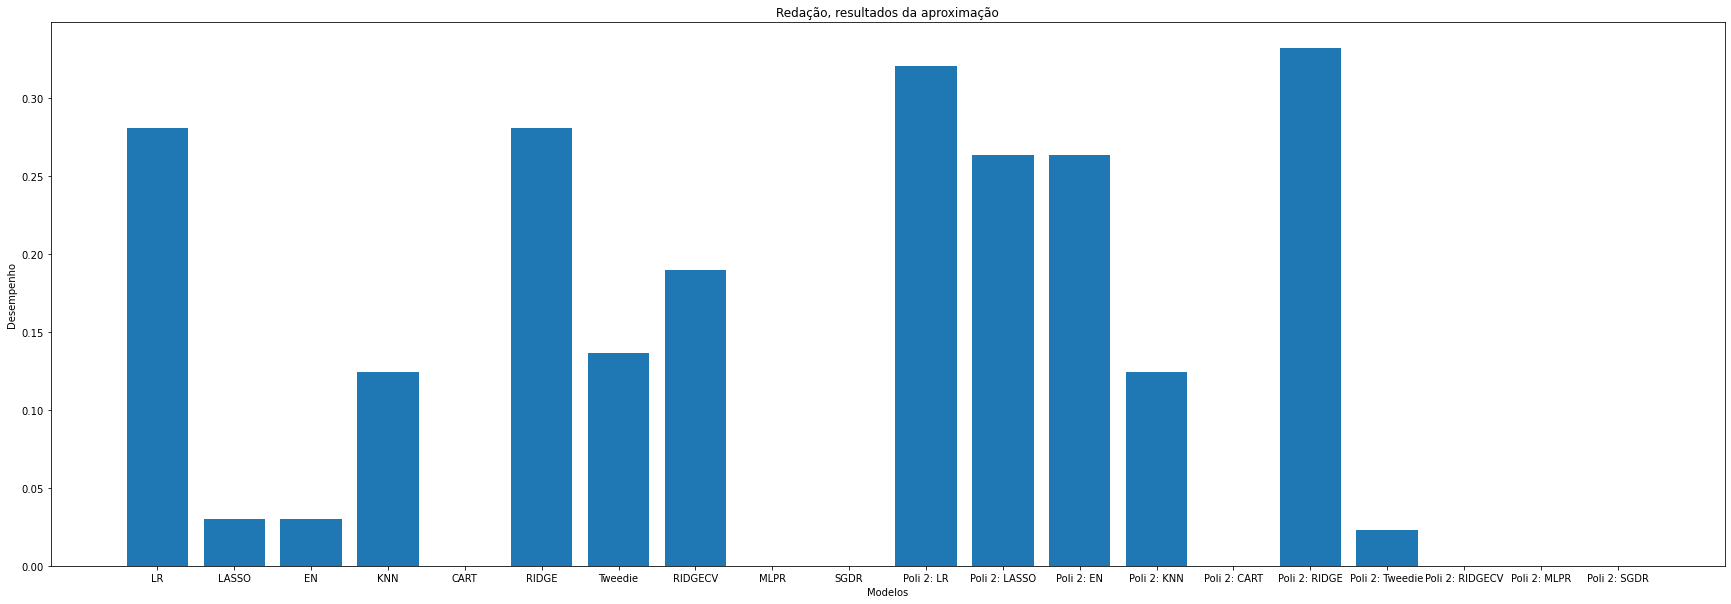

In [54]:
r = []
j = 0
for i in results:
    if i[0] > 0:
        r.append(i[0])
    else:
        r.append(0)
    j = j+1

plt.figure(figsize=(30, 10))
plt.bar(names,r)
plt.title('Redação, resultados da aproximação')
plt.xlabel('Modelos')
plt.ylabel('Desempenho')
plt.show()

### Redes Neurais

Aplicando redes neurais para estimar as notas. Nessa etapa vamos utilizar todos os dados.

In [2]:
df = pd.read_csv("ENEM_data_for_modeling.csv")

In [3]:
t = []
t = ['CO_MUNICIPIO_RESIDENCIA','NU_IDADE','TP_ANO_CONCLUIU','TP_SEXO',"IN_TREINEIRO"]
t.extend(df.columns.tolist()[36:61])
t.extend(df.columns.tolist()[62:])
print(t)
len(t)

y = df["NU_NOTA_REDACAO"]
X = df[t]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

['CO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_SEXO', 'IN_TREINEIRO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'TP_ESCOLA-0', 'TP_ESCOLA-1', 'TP_ESCOLA-2', 'TP_ESTADO_CIVIL-0', 'TP_ESTADO_CIVIL-1', 'TP_ESTADO_CIVIL-2', 'TP_ESTADO_CIVIL-3', 'TP_ESTADO_CIVIL-4', 'TP_COR_RACA-0', 'TP_COR_RACA-1', 'TP_COR_RACA-2', 'TP_COR_RACA-3', 'TP_COR_RACA-4', 'TP_COR_RACA-5']


In [26]:
def coeff_determination(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
inputs = Input(shape = (len(t),))
x = Dense(200, activation='relu')(inputs)
x = Dense(150, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
outputs = Dense(1, activation='linear')(x)

model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 45)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               9200      
_________________________________________________________________
dense_9 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 59,551
Trainable params: 59,551
Non-trainable params: 0
__________________________________________________

In [ ]:
model_fun_api.compile(optimizer='rmsprop', 
                      loss='mse', 
                      metrics=[coeff_determination])

early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)

history = model_fun_api.fit(xtrain, ytrain,
                    batch_size= 150,
                    epochs= 50,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/50
11836/11836 [==============================] - 25s 2ms/step - loss: 17039342.0000 - coeff_determination: -547156352.0000 - val_loss: 0.0332 - val_coeff_determination: -0.0110
Epoch 2/50
11836/11836 [==============================] - 29s 2ms/step - loss: 0.0333 - coeff_determination: -0.0083 - val_loss: 0.0331 - val_coeff_determination: -0.0086
Epoch 3/50
11836/11836 [==============================] - 26s 2ms/step - loss: 0.0333 - coeff_determination: -0.0081 - val_loss: 0.0331 - val_coeff_determination: -0.0072
Epoch 4/50
11836/11836 [==============================] - 26s 2ms/step - loss: 0.0333 - coeff_determination: -0.0079 - val_loss: 0.0331 - val_coeff_determination: -0.0073
Epoch 5/50
11836/11836 [==============================] - 23s 2ms/step - loss: 0.0333 - coeff_determination: -0.0078 - val_loss: 0.0331 - val_coeff_determination: -0.0081
Epoch 6/50
11836/11836 [==============================] - 22s 2ms/step - loss: 0.0333 - coeff_determination: -0.0076 - val_loss: 0

In [ ]:
# 2 inputs, 1 output

social = xtrain.columns[5:30]
person = xtrain.columns[0:5]
person = person.append(xtrain.columns[30:44])

input_social = Input(shape=(25,), name='social')
input_person = Input(shape=(19,), name='person')

x_1 = Dense(50, activation='tanh')(input_social)
x_2 = Dense(50, activation='tanh')(input_person)
x_1 = Dense(50, activation='linear')(x_1)
x_2 = Dense(50, activation='linear')(x_2)

c = concatenate([x_1, x_2])

outputs = Dense(1, activation='tanh', name='outputs')(c)

model = Model(inputs=[input_social, input_person], outputs=outputs)

early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)

model.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=[coeff_determination])
              
history = model.fit({"social": xtrain[social], "person": xtrain[person]},
                    ytrain,
                    batch_size= 150,
                    epochs= 50,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/50
11836/11836 [==============================] - 15s 1ms/step - loss: 0.0316 - coeff_determination: 0.0424 - val_loss: 0.0297 - val_coeff_determination: 0.0944
Epoch 2/50
11836/11836 [==============================] - 14s 1ms/step - loss: 0.0299 - coeff_determination: 0.0961 - val_loss: 0.0294 - val_coeff_determination: 0.1053
Epoch 3/50
11836/11836 [==============================] - 14s 1ms/step - loss: 0.0295 - coeff_determination: 0.1074 - val_loss: 0.0292 - val_coeff_determination: 0.1117
Epoch 4/50
11836/11836 [==============================] - 13s 1ms/step - loss: 0.0293 - coeff_determination: 0.1130 - val_loss: 0.0292 - val_coeff_determination: 0.1120
Epoch 5/50
11836/11836 [==============================] - 12s 1ms/step - loss: 0.0293 - coeff_determination: 0.1148 - val_loss: 0.0297 - val_coeff_determination: 0.0937
Epoch 6/50
11836/11836 [==============================] - 12s 1ms/step - loss: 0.0292 - coeff_determination: 0.1155 - val_loss: 0.0290 - val_coeff_determin

Já com a nota média, as redes neurais performam: 

In [ ]:
t = []
t = ['CO_MUNICIPIO_RESIDENCIA','NU_IDADE','TP_ANO_CONCLUIU','TP_SEXO',"IN_TREINEIRO"]
t.extend(df.columns.tolist()[36:61])
t.extend(df.columns.tolist()[62:])
print(t)
len(t)

y = df["NOTA_MEDIA"]
X = df[t]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

In [68]:
inputs = Input(shape = (44,))
x = Dense(50, activation='linear')(inputs)
x = Dense(50, activation='linear')(x)
x = Dense(100, activation='tanh')(x)
x = Dense(50, activation='tanh')(x)
outputs = Dense(1, activation='linear')(x)

model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.compile(optimizer='rmsprop', 
                      loss='mse', 
                      metrics=[coeff_determination])

early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)

history = model_fun_api.fit(xtrain, ytrain,
                    batch_size= 150,
                    epochs= 50,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/50
13809/13809 [==============================] - 16s 1ms/step - loss: 0.0345 - coeff_determination: -0.0463 - val_loss: 0.0338 - val_coeff_determination: -0.0259
Epoch 2/50
13809/13809 [==============================] - 17s 1ms/step - loss: 0.0340 - coeff_determination: -0.0296 - val_loss: 0.0342 - val_coeff_determination: -0.0400
Epoch 3/50
13809/13809 [==============================] - 20s 1ms/step - loss: 0.0340 - coeff_determination: -0.0297 - val_loss: 0.0337 - val_coeff_determination: -0.0213
Epoch 4/50
13809/13809 [==============================] - 15s 1ms/step - loss: 0.0340 - coeff_determination: -0.0299 - val_loss: 0.0348 - val_coeff_determination: -0.0546
Epoch 5/50
13809/13809 [==============================] - 16s 1ms/step - loss: 0.0340 - coeff_determination: -0.0298 - val_loss: 0.0363 - val_coeff_determination: -0.1057
Epoch 6/50
13809/13809 [==============================] - 15s 1ms/step - loss: 0.0340 - coeff_determination: -0.0295 - val_loss: 0.0333 - val_coe

In [70]:
# 2 inputs, 1 output

social = xtrain.columns[5:30]
person = xtrain.columns[0:5]
person = person.append(xtrain.columns[30:44])

input_social = Input(shape=(25,), name='social')
input_person = Input(shape=(19,), name='person')

x_1 = Dense(100, activation='hard_sigmoid')(input_social)
x_2 = Dense(10, activation='hard_sigmoid')(input_person)
x_1 = Dense(50, activation='linear')(x_1)
x_2 = Dense(10, activation='linear')(x_2)

c = concatenate([x_1, x_2])

outputs = Dense(1, activation='hard_sigmoid', name='outputs')(c)

model = Model(inputs=[input_social, input_person], outputs=outputs)

early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)

model.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=[coeff_determination])
              
history = model.fit({"social": xtrain[social], "person": xtrain[person]},
                    ytrain,
                    batch_size= 150,
                    epochs= 50,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/50
13809/13809 [==============================] - 17s 1ms/step - loss: 0.0297 - coeff_determination: 0.0993 - val_loss: 0.0295 - val_coeff_determination: 0.1060
Epoch 2/50
13809/13809 [==============================] - 17s 1ms/step - loss: 0.0292 - coeff_determination: 0.1164 - val_loss: 0.0291 - val_coeff_determination: 0.1167
Epoch 3/50
13809/13809 [==============================] - 17s 1ms/step - loss: 0.0290 - coeff_determination: 0.1215 - val_loss: 0.0290 - val_coeff_determination: 0.1213
Epoch 4/50
13809/13809 [==============================] - 18s 1ms/step - loss: 0.0289 - coeff_determination: 0.1240 - val_loss: 0.0288 - val_coeff_determination: 0.1251
Epoch 5/50
13809/13809 [==============================] - 17s 1ms/step - loss: 0.0289 - coeff_determination: 0.1262 - val_loss: 0.0288 - val_coeff_determination: 0.1260
Epoch 6/50
13809/13809 [==============================] - 17s 1ms/step - loss: 0.0288 - coeff_determination: 0.1277 - val_loss: 0.0288 - val_coeff_determin

### Aprimorando a modelagem: 
* filtrando as colunas mais relevantes
* Usando a regressão linear polinomial
* Usando boost

In [2]:
df = pd.read_csv("ENEM_data_for_modeling.csv")

In [3]:
t = []
t = ['CO_UF_RESIDENCIA','NU_IDADE','TP_ANO_CONCLUIU','TP_SEXO',"IN_TREINEIRO","TP_LINGUA"]
t.extend(df.columns.tolist()[36:61])
t.extend(df.columns.tolist()[62:])
print(t)

['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_SEXO', 'IN_TREINEIRO', 'TP_LINGUA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'TP_ESCOLA-0', 'TP_ESCOLA-1', 'TP_ESCOLA-2', 'TP_ESTADO_CIVIL-0', 'TP_ESTADO_CIVIL-1', 'TP_ESTADO_CIVIL-2', 'TP_ESTADO_CIVIL-3', 'TP_ESTADO_CIVIL-4', 'TP_COR_RACA-0', 'TP_COR_RACA-1', 'TP_COR_RACA-2', 'TP_COR_RACA-3', 'TP_COR_RACA-4', 'TP_COR_RACA-5']


In [6]:
y = df["NU_NOTA_REDACAO"]
X = df[t]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

print(len(ytrain),len(ytest))

2589090 1109611


In [4]:
cols = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 26, 28, 29, 30}

newCols= []
for i in cols:
    newCols.append(t[i])

print(newCols)

['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_SEXO', 'IN_TREINEIRO', 'TP_LINGUA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q018', 'Q021', 'Q023', 'Q024', 'Q025']


In [5]:
y = df["NU_NOTA_REDACAO"]
X = df[newCols]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

print(len(ytrain),len(ytest))

2589090 1109611


In [26]:
# usando o LightGBM regressor 

model = ltb.LGBMRegressor()
t0 = time.time()
model.fit(xtrain, ytrain)
t1 = t0 - time.time()

ypredict = model.predict(xtest)
scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]


print(t1,scores)

[0.22347465916404263, 0.22347532487389443, 0.11811943391012798, 0.8734835901944537]


#### LightGMB Tuning

In [22]:
num_folds = 10
score = 'r2'
seed = 0

num_leaves = [20,40,60,80,100]
max_depth = [-1,5,10,20]
learning_rate = [0.001, 0.05, 0.1]
min_child_samples = [5,10,15]
reg_alpha = [0,0.01,0.03]

param_distributions = dict(num_leaves=num_leaves, max_depth=max_depth, 
                           learning_rate=learning_rate, min_child_samples=min_child_samples,
                           reg_alpha=reg_alpha)
model = ltb.LGBMRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter= 16, scoring=score, cv=kfold)
grid_result = grid.fit(xtrain, ytrain)


print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean} ({stdev}) with: {param}')

Best: 0.22815383526786973 using {'reg_alpha': 0, 'num_leaves': 80, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.1}
0.030729383734187144 (0.00011473889443803661) with: {'reg_alpha': 0.01, 'num_leaves': 100, 'min_child_samples': 5, 'max_depth': 20, 'learning_rate': 0.001}
0.0306737389370202 (0.0001022818027980097) with: {'reg_alpha': 0.01, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': 10, 'learning_rate': 0.001}
0.21883357013747337 (0.0010917237318345346) with: {'reg_alpha': 0.03, 'num_leaves': 60, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05}
0.024952838743252204 (0.0001184221366204328) with: {'reg_alpha': 0.01, 'num_leaves': 80, 'min_child_samples': 15, 'max_depth': 5, 'learning_rate': 0.001}
0.20714453427418994 (0.0010069823066997797) with: {'reg_alpha': 0, 'num_leaves': 80, 'min_child_samples': 15, 'max_depth': 5, 'learning_rate': 0.05}
0.02785933899781884 (0.00012167643812536496) with: {'reg_alpha': 0.01, 'num_leaves': 40, 'min_child_sam

In [ ]:
plt.scatter(list(ytest)[:1000],list(ypredict)[:1000])

plt.plot([0,1],[0,1])
plt.show()

In [6]:
seed = 0
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(("Tweedie",TweedieRegressor()))
models.append(("XGBoost", xgb.XGBRegressor()))
models.append(("LightGBM", ltb.LGBMRegressor(num_leaves=80,min_child_samples=20,max_depth=20)))

print(models)

[('LR', LinearRegression()), ('LASSO', Lasso(random_state=0)), ('EN', ElasticNet(random_state=0)), ('Tweedie', TweedieRegressor()), ('XGBoost', XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)), ('LightGBM', LGBMRegressor(max_depth=20, num_leaves=80))]


In [7]:
results = []
names = []
times = []
for name, model in models:
    t0 = time.time()
    md = model.fit(xtrain,ytrain)
    time1 = time.time() - t0
    ypredict = md.predict(xtest)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append(name)
    times.append(time1)
    print(name, time1, scores)

LR 23.936552047729492 [0.15098560945875983, 0.15098726509230576, 0.12368289591719987, 0.8335743214282948]
LASSO 1.9669222831726074 [-1.2333489629590133e-07, 0.0, 0.13248209501449282, 0.5799051635902962]
EN 1.000382423400879 [-1.2333489629590133e-07, 0.0, 0.13248209501449282, 0.5799051635902962]
Tweedie 6.12056827545166 [0.07805141042262242, 0.0780521420630258, 0.1274328432855268, 0.6564075918263005]
XGBoost 246.36783051490784 [0.2278053315692976, 0.22780631039245958, 0.11776392687229999, 0.8721078038215637]
LightGBM 31.21811032295227 [0.22814012704052555, 0.22814084990425343, 0.11762071593577604, 0.8614113969035251]


In [9]:
# Regressão Polinomial grau 2

poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(xtrain)
X_poly_test = poly_reg.fit_transform(xtest)
poly_reg.fit(X_poly,ytrain)

for name, model in models:
    t0 = time.time()
    md = model.fit(X_poly,ytrain)
    time1 = time.time() - t0
    ypredict = md.predict(X_poly_test)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append(name)
    times.append(time1)
    print(name, time1, scores)

In [ ]:
r = []
j = 0
for i in results:
    if i[0] > 0:
        r.append(i[0])
    else:
        r.append(0)
    j = j+1

plt.figure(figsize=(30, 10))
plt.bar(names,r)
plt.title('Redação, resultados da aproximação')
plt.xlabel('Modelos')
plt.ylabel('Desempenho')
plt.show()

In [ ]:
inputs = Input(shape = len(cols),)
x = Dense(100, activation='relu')(inputs)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='relu')(x)
outputs = Dense(1, activation='relu')(x)

model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               2700      
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 11        
Total params: 23,921
Trainable params: 23,921
Non-trainable params: 0
_________________________________________________

In [ ]:
model_fun_api.compile(optimizer='rmsprop', 
                      loss='mse', 
                      metrics=[coeff_determination])

early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)

history = model_fun_api.fit(xtrain, ytrain,
                    batch_size= 150,
                    epochs= 50,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/50
13809/13809 [==============================] - 22s 2ms/step - loss: 14359065.0000 - coeff_determination: -381890368.0000 - val_loss: 0.3690 - val_coeff_determination: -10.4583
Epoch 2/50
13809/13809 [==============================] - 22s 2ms/step - loss: 0.3697 - coeff_determination: -10.4652 - val_loss: 0.3690 - val_coeff_determination: -10.4583
Epoch 3/50
13809/13809 [==============================] - 25s 2ms/step - loss: 0.3697 - coeff_determination: -10.4668 - val_loss: 0.3690 - val_coeff_determination: -10.4583
Epoch 4/50
13809/13809 [==============================] - 23s 2ms/step - loss: 0.3697 - coeff_determination: -10.4689 - val_loss: 0.3690 - val_coeff_determination: -10.4583
Epoch 5/50
13809/13809 [==============================] - 24s 2ms/step - loss: 0.3697 - coeff_determination: -10.4603 - val_loss: 0.3690 - val_coeff_determination: -10.4583
Epoch 6/50
13809/13809 [==============================] - 24s 2ms/step - loss: 0.3697 - coeff_determination: -10.4623 - v

Agora, testando com a nota geral média.

In [28]:
t = []
t = ['CO_UF_RESIDENCIA','NU_IDADE','TP_ANO_CONCLUIU','TP_SEXO',"IN_TREINEIRO","TP_LINGUA"]
t.extend(df.columns.tolist()[36:61])
t.extend(df.columns.tolist()[62:])
print(t)

['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_SEXO', 'IN_TREINEIRO', 'TP_LINGUA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'TP_ESCOLA-0', 'TP_ESCOLA-1', 'TP_ESCOLA-2', 'TP_ESTADO_CIVIL-0', 'TP_ESTADO_CIVIL-1', 'TP_ESTADO_CIVIL-2', 'TP_ESTADO_CIVIL-3', 'TP_ESTADO_CIVIL-4', 'TP_COR_RACA-0', 'TP_COR_RACA-1', 'TP_COR_RACA-2', 'TP_COR_RACA-3', 'TP_COR_RACA-4', 'TP_COR_RACA-5']


In [29]:
y = df["NOTA_MEDIA"]
X = df[t]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

print(len(ytrain),len(ytest))

2589090 1109611


In [30]:
cols = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 26, 28, 29, 30}

newCols= []
for i in cols:
    newCols.append(t[i])

print(newCols)

['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_SEXO', 'IN_TREINEIRO', 'TP_LINGUA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q018', 'Q021', 'Q023', 'Q024', 'Q025']


In [31]:
y = df["NOTA_MEDIA"]
X = df[newCols]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

print(len(ytrain),len(ytest))

2589090 1109611


In [44]:
# usando o LightGBM regressor 

model = ltb.LGBMRegressor()
model.fit(xtrain, ytrain)

ypredict = model.predict(xtest)
scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]


print(scores)

[0.40482417951436755, 0.4048249207669856, 0.04331877407876317, 0.2722584695286762]


#### LightGMB Tuning

In [13]:
num_folds = 10
score = 'r2'
seed = 0

num_leaves = [20,40,60,80,100]
max_depth = [-1,5,10,20]
learning_rate = [0.001, 0.05, 0.1]
min_child_samples = [5,10,15]
reg_alpha = [0,0.01,0.03]

param_distributions = dict(num_leaves=num_leaves, max_depth=max_depth, 
                           learning_rate=learning_rate, min_child_samples=min_child_samples,
                           reg_alpha=reg_alpha)
model = ltb.LGBMRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter= 16, scoring=score, cv=kfold)
grid_result = grid.fit(xtrain, ytrain)


print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean} ({stdev}) with: {param}')

Best: 0.41145019142559863 using {'reg_alpha': 0.03, 'num_leaves': 80, 'min_child_samples': 15, 'max_depth': 20, 'learning_rate': 0.1}
0.05638614153690832 (0.00015997622328218944) with: {'reg_alpha': 0.01, 'num_leaves': 80, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.001}
0.3986255310925508 (0.001851006890737276) with: {'reg_alpha': 0.01, 'num_leaves': 20, 'min_child_samples': 15, 'max_depth': 5, 'learning_rate': 0.1}
0.41145019142559863 (0.002087363527758092) with: {'reg_alpha': 0.03, 'num_leaves': 80, 'min_child_samples': 15, 'max_depth': 20, 'learning_rate': 0.1}
0.061659643293398056 (0.00018612241954547675) with: {'reg_alpha': 0, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': 10, 'learning_rate': 0.001}
0.06106498260866285 (0.00018024262676219653) with: {'reg_alpha': 0, 'num_leaves': 80, 'min_child_samples': 15, 'max_depth': -1, 'learning_rate': 0.001}
0.056018567575937886 (0.00017338455973970536) with: {'reg_alpha': 0.03, 'num_leaves': 20, 'min_child_sample

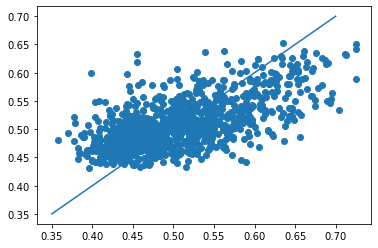

In [50]:
plt.scatter(list(ytest)[:1000],list(ypredict)[:1000])

plt.plot([0.35,0.7],[0.35,0.7])
plt.show()

In [ ]:
seed = 0
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(("Tweedie",TweedieRegressor()))
models.append(("XGBoost", xgb.XGBRegressor()))
models.append(("LightGBM", ltb.LGBMRegressor(reg_alpha=0.03,num_leaves=80,min_child_samples=15,max_depth=20)))

In [ ]:
results = []
names = []
times = []
for name, model in models:
    t0 = time.time()
    md = model.fit(xtrain,ytrain)
    time1 = time.time() - t0
    ypredict = md.predict(xtest)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append(name)
    times.append(time1)
    print(name, time1, scores)

LR 5.077377557754517 [0.31171054895994155, 0.311710685154312, 0.046865241998271974, 0.29589521757241843]
LASSO 3.753582000732422 [0.028593237118722303, 0.028593395049565817, 0.05657160252900079, 0.32215870977667604]
EN 2.397139072418213 [0.02859325115073663, 0.028593409074715193, 0.056571588036717975, 0.32215920357300437]
Tweedie 8.053937435150146 [0.03416719178864591, 0.03429504029849162, 0.05645961889091972, 0.3238508205447219]


In [ ]:
# Regressão Polinomial grau 2

poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(xtrain)
X_poly_test = poly_reg.fit_transform(xtest)
poly_reg.fit(X_poly,ytrain)

for name, model in models:
    t0 = time.time()
    md = model.fit(X_poly,ytrain)
    time1 = time.time() - t0
    ypredict = md.predict(X_poly_test)
    scores = [r2_score(ytest,ypredict),explained_variance_score(ytest,ypredict),mean_absolute_error(ytest,ypredict),max_error(ytest,ypredict)]
    results.append(scores)
    names.append(name)
    times.append(time1)
    print(name, time1, scores)

PolynomialFeatures()

In [ ]:
r = []
j = 0
for i in results:
    if i[0] > 0:
        r.append(i[0])
    else:
        r.append(0)
    j = j+1

plt.figure(figsize=(30, 10))
plt.bar(names,r)
plt.title('Redação, resultados da aproximação')
plt.xlabel('Modelos')
plt.ylabel('Desempenho')
plt.show()

In [24]:
inputs = Input(shape = len(cols),)
x = Dense(100, activation='relu')(inputs)
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='relu')(x)
outputs = Dense(1, activation='relu')(x)

model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               2700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 23,921
Trainable params: 23,921
Non-trainable params: 0
_________________________________________________________

In [32]:
model_fun_api.compile(optimizer='rmsprop', 
                      loss='mse', 
                      metrics=[coeff_determination])

early_stopping = EarlyStopping(monitor='coeff_determination', patience=10)

history = model_fun_api.fit(xtrain, ytrain,
                    batch_size= 150,
                    epochs= 50,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/50
13809/13809 [==============================] - 56s 2ms/step - loss: 0.2635 - coeff_determination: -53.2767 - val_loss: 0.2635 - val_coeff_determination: -53.2924
Epoch 2/50
13809/13809 [==============================] - 31s 2ms/step - loss: 0.2635 - coeff_determination: -53.2861 - val_loss: 0.2635 - val_coeff_determination: -53.2924
Epoch 3/50
13809/13809 [==============================] - 31s 2ms/step - loss: 0.2635 - coeff_determination: -53.2848 - val_loss: 0.2635 - val_coeff_determination: -53.2924
Epoch 4/50
13809/13809 [==============================] - 31s 2ms/step - loss: 0.2635 - coeff_determination: -53.2832 - val_loss: 0.2635 - val_coeff_determination: -53.2924
Epoch 5/50
13809/13809 [==============================] - 28s 2ms/step - loss: 0.2635 - coeff_determination: -53.2821 - val_loss: 0.2635 - val_coeff_determination: -53.2924
Epoch 6/50
13809/13809 [==============================] - 28s 2ms/step - loss: 0.2635 - coeff_determination: -53.2948 - val_loss: 0.263

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

Com a compreenssão melhor dos dados na parte de "Data Understand", e as modificações necessárias dos dados no "Data Preparation", foram realizado diversas técnicas de modelagem e construção de modelos como Rede Neurais, Decision Tree Regressor, Linear Regression, entre outros. Porém, nenhum deles obteve um resultado satisfatório, ou seja, nenhum teve um $R^2$ alto, sendo o melhor utilizando as médias das notas das 4 áreas do conhecimento com o modelo LightGBM regressor que obteve um $R^2$ aproximadamente igual a 0,41. Já para a Redação, o maior $R^2$ obtido foi de aproximadamente 0,22 utilizando o mesmo modelo.

O resultado com baixo coeficiente de determinação não necessarimente quer dizer que foi ruim, já que se o $R^2$ fosse alto, seria resultante, da questão financeira familiar, idade, escolaridade, e entre outras características que a pessoa que realizará a prova não é capaz de controlar. Ou seja, se por um acaso obtivessemos um modelo muito bom, as pessoas não precisariam nem realizar a prova, bastasse preencher a questionário socioeconômico e informações pessoais como idade e sexo, que seria possível obter a nota, logo quem nascesse em uma situação melhor garantiria uma nota alta.

Mesmo não conseguindo um modelo que se ajusta bem aos dados, não significa necessariamente que não há fatores que interferem no desempenho dos alunos, sendo a que tem maior impacto é a questão 6 do questionário socioeconômico que pergunta sobre a renda familiar, e observando o gráfico realizado, vemos que de fato quanto maior a renda familiar, maior é a média das pessoas. Logo em seguida, temos que a idade da pessoa e a questão 24 que aborda a quantidade de computadores que na residência tem bastante influência na nota do aluno.

Em relação as notas das provas, uma de nossas curiosidades era entender se havia de alguma forma uma correlação entre as notas obtidas no Enem e de fato há um certa correlação entre a área de Ciências Humanas com Linguagens e Códigos em torno de 0,8, além das notas da redação e suas competências, que obviamente ocorreria de terem um alta correlação. Já a correlação das outras notas ficam em torno de 0,4 a 0,6, sendo que a correlação entre as notas das 4 áreas do conhecimento com a redação chega a ficar quase todos aproximadamente em 0,4.

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 